# Prepare dataset

## Gdrive setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install torch torchvision torchsummary

In [ ]:
# for (dirpath, dirnames, filenames) in os.walk('/scratch/hp2427/game_data/mario/mario_mask_frames'):
#     if dirpath[dirpath.rindex('/'):dirpath.rindex('/') + 5] == '/clip':
#         # print(dirpath)
#         for f in filenames:
#         #     print(f)
#             new_name = f[:f.rindex('_') + 1] + f"{int(f[f.rindex('_') + 1:f.rindex('.')]):05d}" + f[f.rindex('.'):]
#         #     print(new_name)
#             os.rename(os.path.join(dirpath, f), os.path.join(dirpath, new_name))

# for (dirpath, dirnames, filenames) in os.walk('/scratch/hp2427/game_data/mario/mario_frames'):
#     if dirpath[dirpath.rindex('/'):dirpath.rindex('/') + 5] == '/clip':
#         # print(dirpath)
#         for f in filenames:
#         #     print(f)
#             new_name = f[:f.rindex('_') + 1] + f"{int(f[f.rindex('_') + 1:f.rindex('.')]):05d}" + f[f.rindex('.'):]
#         #     print(new_name)
#             os.rename(os.path.join(dirpath, f), os.path.join(dirpath, new_name))

In [1]:
import os

# project_root = '/content/drive/MyDrive/game_AI_project'

dataset_name = "DAVIS"
project_root = '/home/hp2427/mvst'
data_root = project_root + '/data'
vid_root = data_root + '/videos'
mask_root = data_root + '/masks'
annotations_file_train = data_root + '/annotations_train.txt'
annotations_file_val = data_root + '/annotations_val.txt'
annotations_file_test = data_root + '/annotations_test.txt'

# dataset_name = "MARIO"
# project_root = '/home/hp2427/mvst'
# data_root = '/scratch/hp2427/game_data/mario'
# vid_root = data_root + '/mario_frames'
# mask_root = data_root + '/mario_mask_frames'
# annotations_file_train = data_root + '/mario_annotation_train.txt'
# annotations_file_val = data_root + '/mario_annotation_val.txt'
# annotations_file_test = data_root + '/mario_annotation_test.txt'

# style_root = data_root + '/style'
style_root = '/scratch/hp2427' + '/style' #required for storing large number of files due to inode limits on home dir
style_class_dir = style_root + '/all'
checkpoints_root = project_root + '/checkpoints'
sample_output_root = '/scratch/hp2427' + '/sample_output'

# cur_dir = '/content'
cur_dir = '/home/hp2427/mvst'

for dir in [project_root, data_root, vid_root, mask_root, style_root, style_class_dir, checkpoints_root, sample_output_root]:
    try:
        os.mkdir(dir)
    except OSError as error:
        print(error)

[Errno 17] File exists: '/home/hp2427/mvst'
[Errno 17] File exists: '/home/hp2427/mvst/data'
[Errno 17] File exists: '/home/hp2427/mvst/data/videos'
[Errno 17] File exists: '/home/hp2427/mvst/data/masks'
[Errno 17] File exists: '/scratch/hp2427/style'
[Errno 17] File exists: '/scratch/hp2427/style/all'
[Errno 17] File exists: '/home/hp2427/mvst/checkpoints'
[Errno 17] File exists: '/scratch/hp2427/sample_output'


## get video_dataset.py

In [ ]:
!rm -rf Video-Dataset-Loading-Pytorch*

In [ ]:
!git clone https://github.com/RaivoKoot/Video-Dataset-Loading-Pytorch.git

In [ ]:
!cp Video-Dataset-Loading-Pytorch/video_dataset.py ./video_dataset.py

In [ ]:
!rm -rf Video-Dataset-Loading-Pytorch/

## Download and unzip DAVIS dataset [Not required if already present on mounted google drive]

In [ ]:
!git clone https://github.com/davisvideochallenge/davis-2017.git

In [ ]:
!davis-2017/data/get_davis.sh

In [ ]:
! rm -rf davis-2017/

### Copy data to Google drive, only if required

In [ ]:
#remove dirs where num frames do not match
import os
import os.path as path
# vid_path = '/content/DAVIS/JPEGImages/480p'
# mask_path = '/content/DAVIS/Annotations/480p'

vid_path = cur_dir + '/DAVIS/JPEGImages/480p'
mask_path = cur_dir + '/DAVIS/Annotations/480p'

annotations = []
for f in os.listdir(vid_path):
    if len(os.listdir(path.join(vid_path, f))) != len(os.listdir(path.join(mask_path, f))) or len(os.listdir(path.join(mask_path, f))) == 0:
        print('removing ', f)
        for g in os.listdir(path.join(vid_path, f)):
            os.remove(path.join(vid_path, f, g))
        for g in os.listdir(path.join(mask_path, f)):
            os.remove(path.join(mask_path, f, g))
        os.rmdir(path.join(vid_path, f))
        os.rmdir(path.join(mask_path, f))
    else:
        # print(f)
        min_frame = min(os.listdir(path.join(vid_path, f)))[:-4]
        max_frame = max(os.listdir(path.join(vid_path, f)))[:-4]
        annotations.append((f, min_frame, max_frame, 0))
print(annotations)

In [ ]:
train_count = 60
val_count = 15
test_count = 15

with open(cur_dir + '/annotations_train.txt', 'w') as f:
    for ann in annotations[:train_count]:
        f.write(f'{ann[0]} {int(ann[1])} {int(ann[2])} {ann[3]}\n')

with open(cur_dir + '/annotations_val.txt', 'w') as f:
    for ann in annotations[train_count:train_count+val_count]:
        f.write(f'{ann[0]} {int(ann[1])} {int(ann[2])} {ann[3]}\n')

with open(cur_dir + '/annotations_test.txt', 'w') as f:
    for ann in annotations[train_count+val_count:]:
        f.write(f'{ann[0]} {int(ann[1])} {int(ann[2])} {ann[3]}\n')

In [ ]:
## !rm -rf /content/drive/MyDrive/game_AI_project/data/videos/*
## !rm -rf /content/drive/MyDrive/game_AI_project/data/masks/*
# !mv /content/annotations_train.txt /content/drive/MyDrive/game_AI_project/data/annotations_train.txt
# !mv /content/annotations_val.txt /content/drive/MyDrive/game_AI_project/data/annotations_val.txt
# !mv /content/annotations_test.txt /content/drive/MyDrive/game_AI_project/data/annotations_test.txt
# !mv /content/DAVIS/JPEGImages/480p/* /content/drive/MyDrive/game_AI_project/data/videos/
# !mv /content/DAVIS/Annotations/480p/* /content/drive/MyDrive/game_AI_project/data/masks/

!mv /home/hp2427/mvst/annotations_train.txt /home/hp2427/mvst/data/annotations_train.txt
!mv /home/hp2427/mvst/annotations_val.txt /home/hp2427/mvst/data/annotations_val.txt
!mv /home/hp2427/mvst/annotations_test.txt /home/hp2427/mvst/data/annotations_test.txt
!mv /home/hp2427/mvst/DAVIS/JPEGImages/480p/* /home/hp2427/mvst/data/videos/
!mv /home/hp2427/mvst/DAVIS/Annotations/480p/* /home/hp2427/mvst/data/masks/
!rm -rf /home/hp2427/mvst/DAVIS/

## Visualize video data samples

In [2]:
from video_dataset import  VideoFrameDataset, ImglistToTensor
from torchvision import transforms
import torch
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os


def plot_video(rows, cols, frame_list, plot_width, plot_height, title: str):
    fig = plt.figure(figsize=(plot_width, plot_height))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )

    for index, (ax, im) in enumerate(zip(grid, frame_list)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(index)
    plt.suptitle(title)
    plt.show()


def denormalize(video_tensor):
        """
        Undoes mean/standard deviation normalization, zero to one scaling,
        and channel rearrangement for a batch of images.
        args:
            video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        """
        inverse_normalize = transforms.Normalize(
            mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
            std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
        )
        return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()


def video_dataset_demo():
    """
    This demo uses the dummy dataset inside of the folder "demo_dataset".
    It is structured just like a real dataset would need to be structured.

    TABLE OF CODE CONTENTS:
    1. Minimal demo without image transforms
    2. Minimal demo without sparse temporal sampling for single continuous frame clips, without image transforms
    3. Demo with image transforms
    4. Demo 3 continued with PyTorch dataloader
    5. Demo of using a dataset where samples have multiple separate class labels

    """
    # videos_root = os.path.join('/content', 'DAVIS/JPEGImages/480p')
    # masks_root = os.path.join('/content', 'DAVIS/Annotations/480p')
    # annotation_file = os.path.join('/content', 'annotations.txt')
    videos_root = vid_root
    masks_root = mask_root
    annotation_file = annotations_file_train

    preprocess = transforms.Compose([
        ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    preprocess_mask = transforms.Compose([
        ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        torchvision.transforms.Grayscale(num_output_channels=3),
        torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0.5), dtype=torch.float32)),
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


    """ DEMO 1 WITHOUT IMAGE TRANSFORMS """
    dataset = VideoFrameDataset(
        root_path=videos_root,
        annotationfile_path=annotation_file,
        num_segments=10,
        frames_per_segment=1,
        imagefile_template='frame_{:05d}.png',
        transform=preprocess,
        test_mode=True
    )

    mask_dataset = VideoFrameDataset(
        root_path=masks_root,
        annotationfile_path=annotation_file,
        num_segments=10,
        frames_per_segment=1,
        imagefile_template='mask_frame_{:05d}.png',
        transform=preprocess_mask,
        test_mode=True
    )
    
    if dataset_name == "DAVIS":
        preprocess_mask = transforms.Compose([
            ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
            torchvision.transforms.Grayscale(num_output_channels=3),
            torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),
            transforms.Resize(256),  # image batch, resize smaller edge to 299
            transforms.CenterCrop(256),  # image batch, center crop to square 299x299
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        dataset = VideoFrameDataset(
            root_path=videos_root,
            annotationfile_path=annotation_file,
            num_segments=10,
            frames_per_segment=1,
            imagefile_template='{:05d}.jpg',
            transform=preprocess,
            test_mode=True
        )
        mask_dataset = VideoFrameDataset(
            root_path=masks_root,
            annotationfile_path=annotation_file,
            num_segments=10,
            frames_per_segment=1,
            imagefile_template='{:05d}.png',
            transform=preprocess_mask,
            test_mode=True
        )

    sample = dataset[10]
    frames = sample[0]  # list of PIL images
    label = sample[1]   # integer label

    plot_video(rows=1, cols=5, frame_list=denormalize(frames), plot_width=15., plot_height=3.,
               title='Evenly Sampled Frames')

    mask_sample = mask_dataset[10]
    mask_frames = mask_sample[0]  # list of PIL images
    mask_label = mask_sample[1]   # integer label

    plot_video(rows=1, cols=5, frame_list=(mask_frames * 255).type(torch.uint8).permute(0,2,3,1).numpy(), plot_width=15., plot_height=3.,
               title='Evenly Sampled Frames')
    print('Dataset size : ', len(dataset))


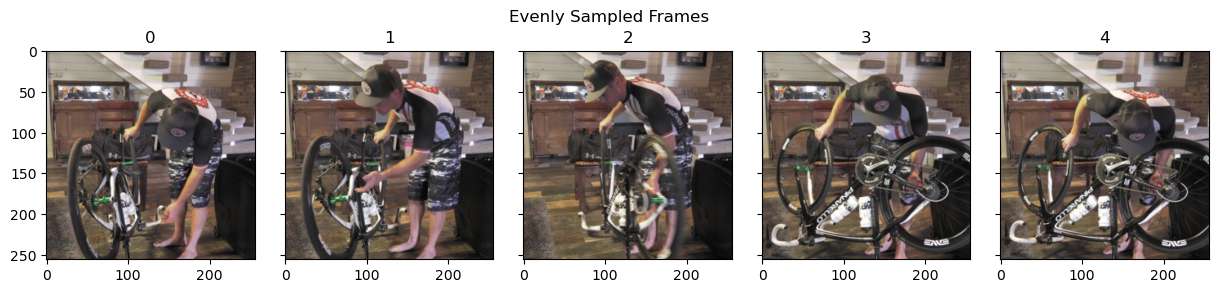

/state/partition1/job-46403807/ipykernel_2418428/616707507.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),


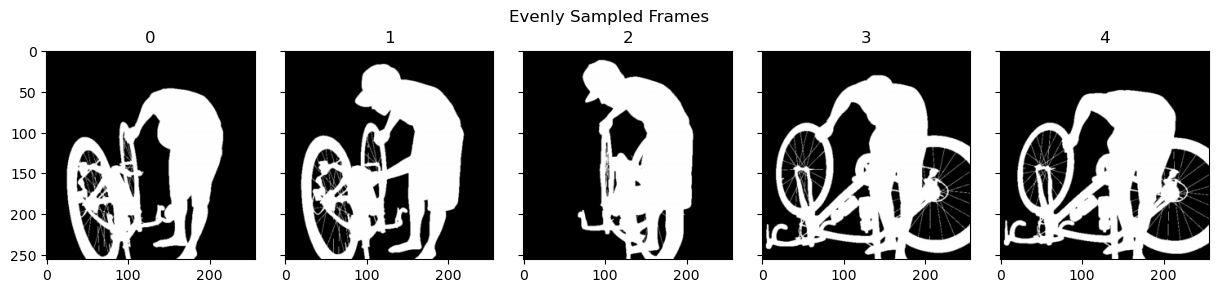

Dataset size :  60


In [3]:
video_dataset_demo()

## Download and unzip style dataset [Not required if already present on mounted google drive]

In [ ]:
!git clone https://github.com/himanshu1196/game-ai-style-transfer.git

In [ ]:
# !mv game-ai-style-transfer/data/style_random100.zip /content/drive/MyDrive/game_AI_project/data/style/all/random100.zip
# !unzip /content/drive/MyDrive/game_AI_project/data/style/all/random100.zip -d /content/drive/MyDrive/game_AI_project/data/style/all/
# !rm /content/drive/MyDrive/game_AI_project/data/style/all/random100.zip
# !mv /content/drive/MyDrive/game_AI_project/data/style/all/style_random100/* /content/drive/MyDrive/game_AI_project/data/style/all/
# !rm -rf /content/drive/MyDrive/game_AI_project/data/style/all/style_random100/

# !mv game-ai-style-transfer/data/style_random100.zip /home/hp2427/mvst/data/style/all/random100.zip
# !unzip /home/hp2427/mvst/data/style/all/random100.zip -d /home/hp2427/mvst/data/style/all/
# !rm /home/hp2427/mvst/data/style/all/random100.zip
# !mv /home/hp2427/mvst/data/style/all/style_random100/* /home/hp2427/mvst/data/style/all/
# !rm -rf /home/hp2427/mvst/data/style/all/style_random100/

### after uploading resized.zip to .../data/style/ dir
# !unzip /home/hp2427/mvst/data/style/resized.zip -d /scratch/hp2427/style/all/
# !rm -rf /scratch/hp2427/style/all/__MACOSX/
# !mv /scratch/hp2427/style/all/resized/* /scratch/hp2427/style/all/
# !rm -rf /scratch/hp2427/style/all/resized/

## Visualize style dataset

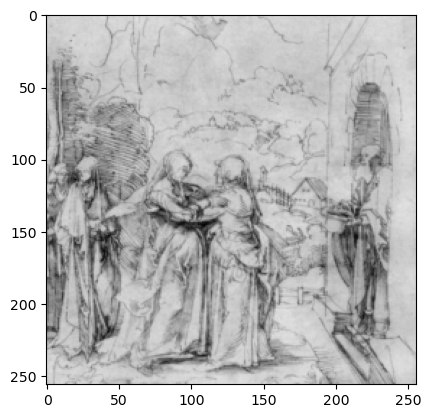

In [4]:
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

style_dataset = torchvision.datasets.ImageFolder(style_root, transforms.Compose([
    transforms.Resize(256),  # image batch, resize smaller edge to 299
    transforms.CenterCrop(256),  # image batch, center crop to square 299x299
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]))

rnd_idx = np.random.randint(100)
plt.imshow(denormalize(style_dataset[rnd_idx][0].unsqueeze(0))[0])

## Define MVST Dataset

In [5]:
import os
from PIL import Image
import torch.nn.functional as F

import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_video
from torch.utils.data import Dataset
import random
from video_dataset import  VideoFrameDataset, ImglistToTensor

def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image

def denormalize(video_tensor):
    """
    Undoes mean/standard deviation normalization, zero to one scaling,
    and channel rearrangement for a batch of images.
    args:
        video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    """
    inverse_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()

class MVSTDataset(Dataset):
    def __init__(self,cont_vids_path, cont_mask_vids_path, annotations_path, style_imgs_path, num_classes, img_size=256, num_segments=10, frames_per_segment=1, \
                 contfile_template='{:05d}.jpg', maskfile_template='{:05d}.png', preprocess_mask_lambda = None):
        self.preprocess = transforms.Compose([
            ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
            transforms.Resize(img_size),  # image batch, resize smaller edge to img_size
            transforms.CenterCrop(img_size),  # image batch, center crop to square img_size x img_size
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        if preprocess_mask_lambda is None:
            preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)
        
        self.preprocess_mask = transforms.Compose([
            ImglistToTensor(),  # list of PIL images to (FRAMES x 1 x HEIGHT x WIDTH) tensor
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.Lambda(preprocess_mask_lambda),
            transforms.Resize(img_size),  # image batch, resize smaller edge to img_size
            transforms.CenterCrop(img_size),  # image batch, center crop to square img_size x img_size
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        self.cont_vids_path = cont_vids_path
        self.cont_mask_vids_path = cont_mask_vids_path
        self.annotation_file = annotations_path
        self.style_imgs_path = style_imgs_path
        self.img_size = img_size
        assert(num_classes == 2)
        self.num_classes = num_classes
        
        self.dataset = VideoFrameDataset(
            root_path=cont_vids_path,
            annotationfile_path=annotations_path,
            num_segments=num_segments,
            frames_per_segment=frames_per_segment,
            imagefile_template=contfile_template,
            transform=self.preprocess,
            test_mode=True
        )

        self.mask_dataset = VideoFrameDataset(
            root_path=cont_mask_vids_path,
            annotationfile_path=annotations_path,
            num_segments=num_segments,
            frames_per_segment=frames_per_segment,
            imagefile_template=maskfile_template,
            transform=self.preprocess_mask,
            test_mode=True
        )

        self.style_dataset = torchvision.datasets.ImageFolder(self.style_imgs_path, transforms.Compose([
            transforms.Resize(img_size),  # image batch, resize smaller edge to 299
            transforms.CenterCrop(img_size),  # image batch, center crop to square 299x299
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]))

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self,idx):
        # two random style images
        style_idx1 = np.random.randint(len(self.style_dataset))
        style_idx2 = np.random.randint(len(self.style_dataset))
        while style_idx2 == style_idx1:
            style_idx2 = np.random.randint(len(self.style_dataset))

        cont_idx = idx

        cont_vid_item = self.dataset.__getitem__(cont_idx)[0]
        cont_mask_vid_item = self.mask_dataset.__getitem__(cont_idx)[0]
        style_img_item1 = self.style_dataset.__getitem__(style_idx1)[0]
        style_img_item2 = self.style_dataset.__getitem__(style_idx2)[0]

        cont_mask_vid_item = torch.unsqueeze(cont_mask_vid_item, 0) # 1xFx3x256x256

        style_img_item1 = torch.unsqueeze(style_img_item1, 0) # 1x3x256x256
        style_img_item2 = torch.unsqueeze(style_img_item2, 0) # 1x3x256x256
        # print(f'loading : {cont_mask_vid_item.min()} {cont_mask_vid_item.max()} {(1-cont_mask_vid_item).min()} {(1-cont_mask_vid_item).max()}')
        return cont_vid_item, torch.cat([cont_mask_vid_item, 1-cont_mask_vid_item], dim=0), torch.cat([style_img_item1, style_img_item2], dim=0)


    def list_files(self, in_path):
        files = []
        for (dirpath, dirnames, filenames) in os.walk(in_path):
            files.extend(filenames)
            break
        files = sorted([os.path.join(in_path, x) for x in files])
        return files


### Visualize MVSTDataset

Using device: cuda


/state/partition1/job-46403807/ipykernel_2418428/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


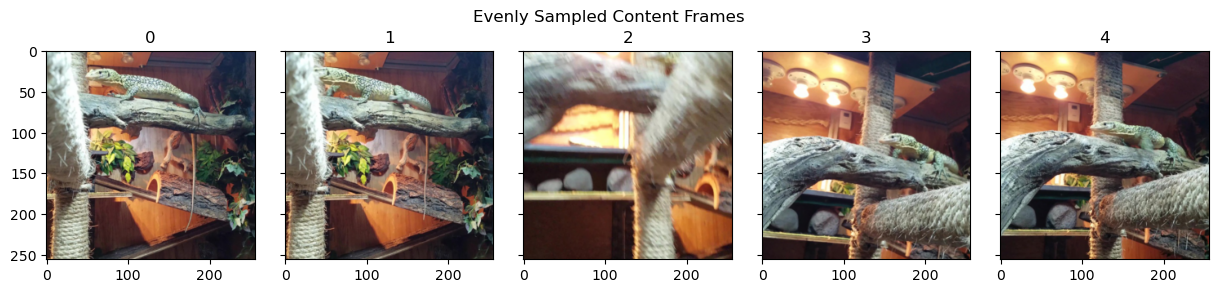

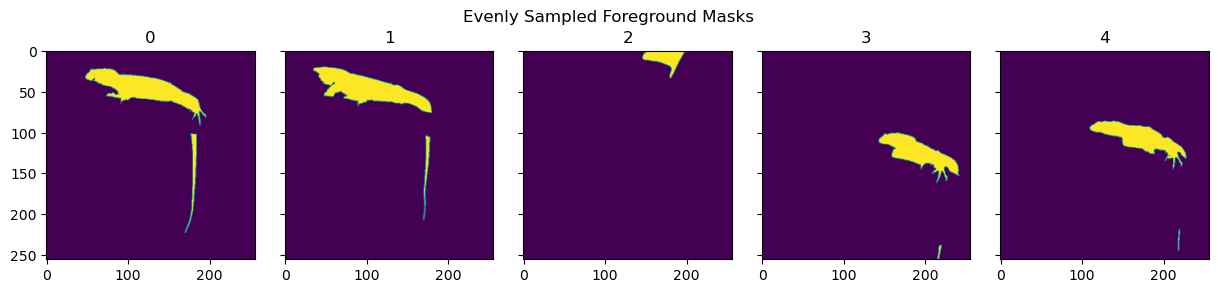

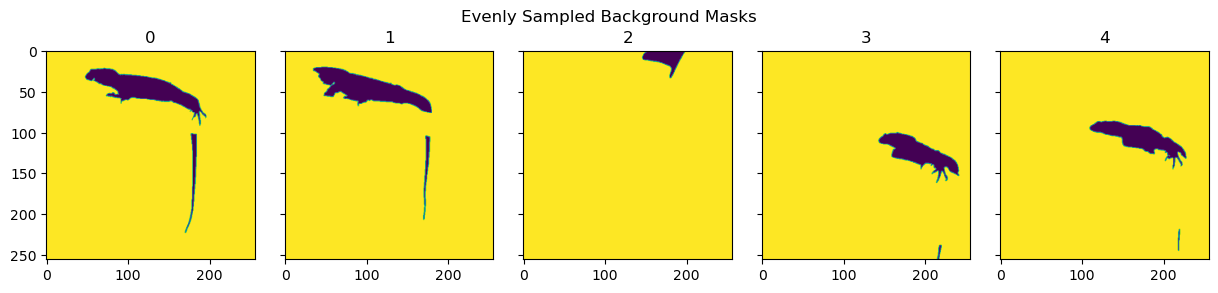

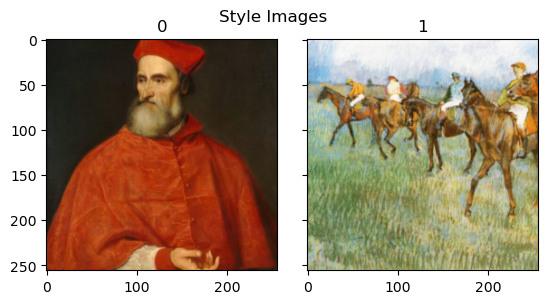

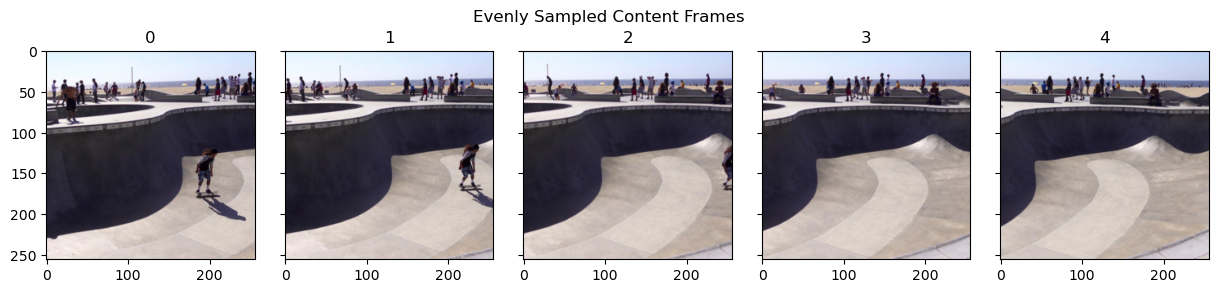

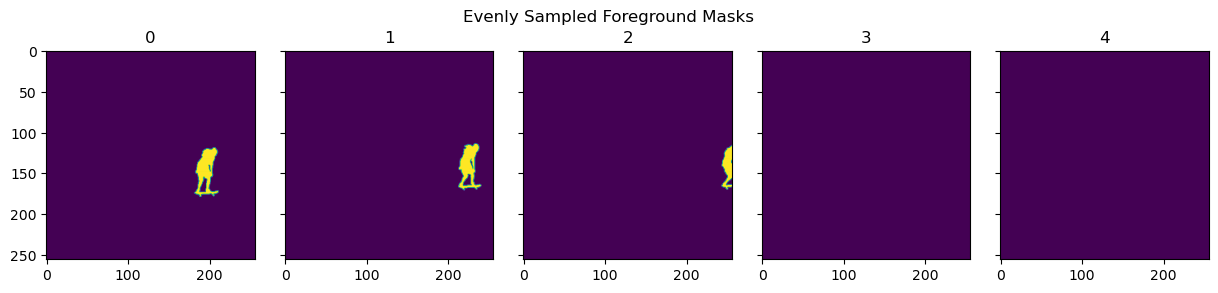

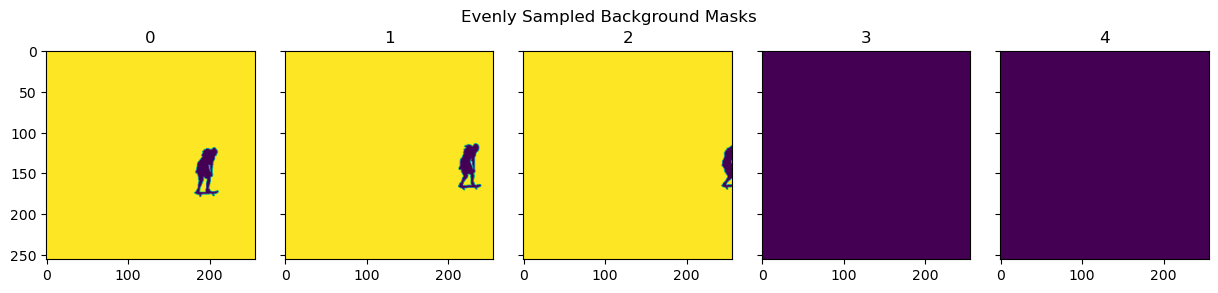

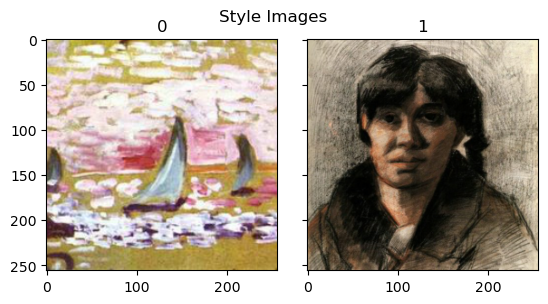

In [6]:
from torch.utils.data import DataLoader
from torch.optim import SGD, Adam
from torchvision.models.optical_flow import raft_small
from torchvision.models.optical_flow import Raft_Small_Weights
import sys

args = {}
args['cont_vids_path'] = vid_root #/vids
args['cont_mask_vids_path'] = mask_root #/mask_vids
args['annotations_path'] = annotations_file_val #/mask_vids
args['style_imgs_path'] = style_root #/style_images
args['num_classes'] = 2
args['batch_size'] = 4
args['checkpoint_path'] = checkpoints_root
args['output_path'] = sample_output_root
args['log_interval'] = 1
args['ckpt_interval'] = 2

cont_vids_path = args['cont_vids_path'] #/vids
cont_mask_vids_path = args['cont_mask_vids_path'] #/mask_vids
annotations_path = args['annotations_path'] #/annotations_path
style_imgs_path = args['style_imgs_path'] #/style_images
num_classes = args['num_classes'] #/num_classes
batch_size = args['batch_size']
checkpoint_path = args['checkpoint_path']
output_path = args['output_path']
log_interval = args['log_interval']
ckpt_interval = args['ckpt_interval']

# set dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if dataset_name == "DAVIS":
    val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path, style_imgs_path, num_classes, img_size=256)
else:
    val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path, style_imgs_path, num_classes, img_size=256, num_segments=1, \
                          frames_per_segment=10, contfile_template='frame_{:05d}.png', maskfile_template='mask_frame_{:05d}.png', \
                          preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
val_loader = DataLoader(val_dataset, batch_size=batch_size)
    

count = 0
for i ,(cont_imgs, mask_img_lists, style_img_lists) in enumerate(val_loader):
    #cont_img is B x num_frames x 3 x 256 x 256
    plot_video(rows=1, cols=5, frame_list=denormalize(cont_imgs[0]), plot_width=15., plot_height=3.,
               title='Evenly Sampled Content Frames')
    plot_video(rows=1, cols=5, frame_list=(mask_img_lists[0][0] * 255).type(torch.uint8).permute(0,2,3,1).numpy(), plot_width=15., plot_height=3.,
               title='Evenly Sampled Foreground Masks')
    plot_video(rows=1, cols=5, frame_list=(mask_img_lists[0][1] * 255).type(torch.uint8).permute(0,2,3,1).numpy(), plot_width=15., plot_height=3.,
               title='Evenly Sampled Background Masks')
    plot_video(rows=1, cols=2, frame_list=denormalize(style_img_lists[0]), plot_width=15., plot_height=3.,
               title='Style Images')
    count += 1
    if count >1:
        break

# Masked Video Style Transfer Model

### Define model

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time

import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import models
from torchsummary import summary
from torchvision.models.feature_extraction import create_feature_extractor

In [8]:
# model architecture

def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image

def calc_mean_std(feat, eps=1e-5):
    # eps is a small value added to the variance to avoid divide-by-zero.
    size = feat.size()
    assert (len(size) == 4)
    N, C = size[:2]
    feat_var = feat.view(N, C, -1).var(dim=2) + eps
    feat_std = feat_var.sqrt().view(N, C, 1, 1)
    feat_mean = feat.view(N, C, -1).mean(dim=2).view(N, C, 1, 1)
    return feat_mean, feat_std

def calc_mean_std_with_mask(x, mask, eps = 1e-5, eps_mean = 1e-3):
    """
    x of shape: [batch_size (N), features(C), num_objects (L)]
    mask of shape: [batch_size (N), num_objects (L)]
    """
    N, C = x.shape[0], x.shape[1]
    mask = mask.float().unsqueeze(1)  # (N,1,L)
    mean = (torch.sum(x * mask, 2) / (torch.sum(mask, 2) + eps_mean))   # (N,C)
    mean = mean.detach()
    var_term = ((x - mean.unsqueeze(2).expand_as(x)) * mask)**2  # (N,C,L)
    var = (torch.sum(var_term, 2) / (torch.sum(mask, 2) + eps))  #(N,C)
    var = var.detach()
    mean_reshaped = mean.view(N,C,1,1)  # (N, C, 1, 1)
    var_reshaped = var.view(N,C,1,1)    # (N, C, 1, 1)
    if mean_reshaped.isnan().any() or var_reshaped.isnan().any():
        print('...', mean_reshaped.isnan().any(), var_reshaped.isnan().any(), torch.sum(mask, 2))
    return mean_reshaped, var_reshaped ** 0.5

def ada_in(style_features, content_cur_masked_features, eps = 1e-5):
    # print('#', style_features.shape, content_cur_masked_features.shape, content_prev_masked_features.shape) #BxCxSxS

    x_cur_mean, x_cur_std = calc_mean_std(content_cur_masked_features)
    x_cur_std += eps

    style_mean, style_std = calc_mean_std(style_features)

    result = style_std * (content_cur_masked_features - x_cur_mean) / x_cur_std + style_mean
    return result

def ada_in_with_mask(style_features, content_cur_features, mask_cur, eps = 1e-3, beta = 1):
    # print('#', style_features.shape, content_cur_masked_features.shape, content_prev_masked_features.shape) #BxCxSxS
    assert(len(content_cur_features.shape) == 4)
    B = content_cur_features.shape[0]
    C, H, W = content_cur_features.shape[-3], content_cur_features.shape[-2], content_cur_features.shape[-1]

    content_view = content_cur_features.view(B,C,-1)
    styleView = style_features.view(B,C,-1)

    mask_cur_resized = torchvision.transforms.Resize(size=(H,W), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)(mask_cur) #B x 1 x H x W
    mask_cur_resized_view = torch.reshape(mask_cur_resized, shape = (B,H*W)) # (N,1,L)

    x_cur_mean, x_cur_std = calc_mean_std_with_mask(content_view, mask_cur_resized_view)

    style_mean, style_std = calc_mean_std(style_features)

    result = style_std * (content_cur_features - x_cur_mean) / (x_cur_std + eps) + style_mean
    result = beta * result + (1-beta)*content_cur_features
    return result * mask_cur_resized #zero out volume outside the mask

def st_ada_in(style_features, content_cur_features, content_prev_features, mask_cur, mask_prev, alpha = 0.1, eps = 1e-3, beta = 1):
    #use mask 1s as index into content features
    # print('#', style_features.shape, content_cur_masked_features.shape, content_prev_masked_features.shape) #BxCxSxS B x 512 x 32 x32
    assert(len(content_cur_features.shape) == 4)
    B = content_cur_features.shape[0]
    C, H, W = content_cur_features.shape[-3], content_cur_features.shape[-2], content_cur_features.shape[-1]

    content_view = content_cur_features.view(B,C,-1)
    content_prev_view = content_prev_features.view(B,C,-1)
    styleView = style_features.view(B,C,-1)

    mask_cur_resized = torchvision.transforms.Resize(size=(H,W), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)(mask_cur) #B x 1 x H x W
    mask_cur_resized_view = torch.reshape(mask_cur_resized, shape = (B,H*W))

    mask_prev_resized = torchvision.transforms.Resize(size=(H,W), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)(mask_prev) #B x 1 x H x W
    mask_prev_resized_view = torch.reshape(mask_prev_resized, shape = (B,H*W))

    x_cur_mean, x_cur_std = calc_mean_std_with_mask(content_view, mask_cur_resized_view)
    x_prev_mean, x_prev_std = calc_mean_std_with_mask(content_prev_view, mask_prev_resized_view)

    # print('#', type(alpha), type(x_cur_mean), type(x_prev_mean))
    combined_mean = (1-alpha) * x_cur_mean + alpha * x_prev_mean #BxCxL
    combined_std = (1-alpha) * x_cur_std + alpha * x_prev_std

    style_mean, style_std = calc_mean_std(style_features)

    result = style_std * (content_cur_features - combined_mean) / (combined_std + eps) + style_mean

    result = beta * result + (1-beta)*content_cur_features

    return result * mask_cur_resized #zero out volume outside the mask

def get_vgg_normalized(model_path=checkpoints_root + '/vgg_normalised.pth'):
    # pretrained model from arbitrary img style transfer repo
    vgg = nn.Sequential(
        nn.Conv2d(3, 3, (1, 1)),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(3, 64, (3, 3)),
        nn.ReLU(),  # relu1-1
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(64, 64, (3, 3)),
        nn.ReLU(),  # relu1-2
        nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(64, 128, (3, 3)),
        nn.ReLU(),  # relu2-1
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(128, 128, (3, 3)),
        nn.ReLU(),  # relu2-2
        nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(128, 256, (3, 3)),
        nn.ReLU(),  # relu3-1
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),  # relu3-2
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),  # relu3-3
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),  # relu3-4
        nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 512, (3, 3)),
        nn.ReLU(),  # relu4-1, this is the last layer used
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu4-2
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu4-3
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu4-4
        nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu5-1
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu5-2
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU(),  # relu5-3
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 512, (3, 3)),
        nn.ReLU()  # relu5-4
    )

    if os.path.exists(model_path):
        checkpoint = torch.load(model_path)
        vgg.load_state_dict(checkpoint)
        print(f'loaded vgg {model_path}')

    for param in vgg.parameters():
        param.requires_grad = False

    # To specify the nodes you want to extract, you could select the final node
    # that appears in each of the main layers:
    return_nodes = {
        # node_name: user-specified key for output dict
        '3': 'layer1',
        '10': 'layer2',
        '17': 'layer3',
        '30': 'layer4',
    }

    return create_feature_extractor(vgg, return_nodes=return_nodes)


def get_decoder():
    return nn.Sequential(
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(512, 256, (3, 3)),
        nn.ReLU(),
        nn.Upsample(scale_factor=2, mode='nearest'),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 256, (3, 3)),
        nn.ReLU(),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(256, 128, (3, 3)),
        nn.ReLU(),
        nn.Upsample(scale_factor=2, mode='nearest'),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(128, 128, (3, 3)),
        nn.ReLU(),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(128, 64, (3, 3)),
        nn.ReLU(),
        nn.Upsample(scale_factor=2, mode='nearest'),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(64, 64, (3, 3)),
        nn.ReLU(),
        nn.ReflectionPad2d((1, 1, 1, 1)),
        nn.Conv2d(64, 3, (3, 3)),
    )


class SpatioTemporalTransferModel(nn.Module):
    def __init__(self, vgg_feature_extractor):
        super(SpatioTemporalTransferModel, self).__init__()
        self.vgg_feature_extractor = vgg_feature_extractor
        return

    def forward(self, style_list, content, mask, mask_prev, cpe_1, cpe_2, cpe_3, cpe_4, adap_1, adap_2, adap_3, f_beta = 1, b_beta = 1, use_stada = True):
        # Encode the style and content image.

        style_encoded_dict_f = self.vgg_feature_extractor(style_list[:,0,:,:,:])
        style_encoded_f = [style_encoded_dict_f[f'layer{i}'] for i in range(1,5)]

        style_encoded_dict_b = self.vgg_feature_extractor(style_list[:,1,:,:,:])
        style_encoded_b = [style_encoded_dict_b[f'layer{i}'] for i in range(1,5)]

        content_encoded_dict = self.vgg_feature_extractor(content)
        content_encoded = [content_encoded_dict[f'layer{i}'] for i in range(1,5)]

        # Compute the AdaIN target feature maps.
        st_ada_in_outputs = []
        # skip block1_conv1
        skipCount = 1
        count = 0
        content_prev_encoded = [cpe_1, cpe_2, cpe_3, cpe_4]

        # print('STM, ', style_encoded_f[-1].min(), style_encoded_f[-1].max())
        if use_stada:
            st_ada_in_output_f = st_ada_in(style_encoded_f[-1], content_encoded[-1], content_prev_encoded[-1], mask[:,0,:,:,:], mask_prev[:,0,:,:,:], alpha = 0.1, beta=f_beta)
            st_ada_in_output_b = st_ada_in(style_encoded_b[-1], content_encoded[-1], content_prev_encoded[-1], mask[:,1,:,:,:], mask_prev[:,1,:,:,:], alpha = 0.1, beta=b_beta)
            bilateral_grid = st_ada_in_output_f + st_ada_in_output_b
        else:
            ada_in_output_f = ada_in_with_mask(style_encoded_f[-1], content_encoded[-1], mask[:,0,:,:,:], beta=f_beta)
            ada_in_output_b = ada_in_with_mask(style_encoded_b[-1], content_encoded[-1], mask[:,1,:,:,:], beta=b_beta)
            bilateral_grid = ada_in_output_f + ada_in_output_b

        content_prev_encoded = content_encoded.copy()

        return bilateral_grid, content_prev_encoded[0], content_prev_encoded[1], content_prev_encoded[2], content_prev_encoded[3], adap_1, adap_2, adap_3,

#########################################################################################################
class MaskedVideoStyleTransfer(nn.Module):
    def __init__(self, vgg_feature_extractor, decoder):
        super(MaskedVideoStyleTransfer, self).__init__()
        self.vgg_feature_extractor = vgg_feature_extractor
        self.spatio_temporal_model = SpatioTemporalTransferModel(self.vgg_feature_extractor)
        self.decoder = decoder


    def forward(self, content, mask_cur_list, style_list, mask_prev_list, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, f_beta = 1, b_beta = 1, use_stada = True):
        # model : torch.Size([2, 3, 256, 256]) torch.Size([2, 2, 3, 256, 256]) torch.Size([2, 2, 3, 256, 256]) torch.Size([2, 3, 256, 256]) torch.Size([2, 2, 3, 256, 256]) torch.Size([2, 2, 64, 224, 224]) torch.Size([2, 2, 128, 112, 112]) torch.Size([2, 2, 256, 56, 56]) torch.Size([2, 2, 512, 28, 28]) torch.Size([2, 2, 8, 112, 112]) torch.Size([2, 2, 16, 56, 56]) torch.Size([2, 2, 32, 28, 28])
        # print('model :', content.shape, mask_cur_list.shape, style_list.shape, mask_prev_list.shape, cpe_1_all.shape, cpe_2_all.shape, cpe_3_all.shape, cpe_4_all.shape, adap_1_all.shape, adap_2_all.shape, adap_3_all.shape)

        bilateral_grid_list = []
        bilateral_grid, cpe_1_, cpe_2_, cpe_3_, cpe_4_, adap_1, adap_2, adap_3 = self.spatio_temporal_model(style_list, content, mask_cur_list, mask_prev_list, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, f_beta, b_beta, use_stada)

        cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all = cpe_1_, cpe_2_, cpe_3_, cpe_4_, adap_1, adap_2, adap_3

        output = self.decoder(bilateral_grid)
        return output, bilateral_grid, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all
########################################################################################################


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding="same", stride=1, use_bias=True, activation=nn.ReLU,
                 batch_norm=False):
        super(ConvBlock, self).__init__()
        reflection_padding = kernel_size // 2 # same dimension after padding
        self.reflection_pad = nn.ReflectionPad2d(reflection_padding)
        self.conv = nn.Conv2d(int(in_channels), int(out_channels), kernel_size, stride=stride, bias=use_bias)
        self.activation = activation() if activation else None
        self.bn = nn.BatchNorm2d(out_channels) if batch_norm else None

    def forward(self, x):
        x = self.reflection_pad(x)
        x = self.conv(x)
        if self.bn:
            x = self.bn(x)
        if self.activation:
            x = self.activation(x)
        return x

def get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path):
    # vgg_feature_extractor = get_VGG_feature_extractor().to(device)
    vgg_feature_extractor = get_vgg_normalized(vgg_pre_path).to(device)

    decoder = get_decoder().to(device)
    if os.path.exists(decoder_path):
        checkpoint = torch.load(decoder_path)
        decoder.load_state_dict(checkpoint)
        print(f'loaded decoder {decoder_path}')

    model = MaskedVideoStyleTransfer(vgg_feature_extractor, decoder).to(device)
    model.eval()
    if os.path.exists(model_pre_path):
        checkpoint = torch.load(model_pre_path)
        model.load_state_dict(checkpoint)
        print(f'loaded model {model_pre_path}')
    
    if model_name.startswith("encdec_baseline"):
        #freeze param weights of required modules
        for child in model.named_children():
            if child[0] == 'vgg_feature_extractor':
                child[1].requires_grad_(False)
            if child[0] == 'decoder':
                child[1].requires_grad_(False)
    elif model_name.startswith("encdec_finetune_dec3"):
        #freeze param weights of required modules
        for child in model.named_children():
            if child[0] == 'vgg_feature_extractor':
                child[1].requires_grad_(False)
            if child[0] == 'decoder':
                child[1].requires_grad_(False)
                for dec_child in child[1].named_children():
                    if dec_child[0] in ['21', '25', '28']: # final 3 conv layers of decoder
                        dec_child[1].requires_grad_(True)
    else:
        print("unknown model name")
        return None

    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    tparams = sum([np.prod(p.size()) for p in model_parameters])
    print(f'Number of trainable params for {model_name} : ', tparams)
    
    return model, vgg_feature_extractor

## Util functions and loss functions

In [9]:
def warp_with_flow(x, flo):
    """
    x: [B, C, H, W] (prev_image)
    flo: [B, 2, H, W] flow

    """
    device = x.get_device()
    B, C, H, W = x.size()
    # mesh grid
    xx = torch.arange(0, W).view(1 ,-1).repeat(H ,1)
    yy = torch.arange(0, H).view(-1 ,1).repeat(1 ,W)
    xx = xx.view(1 ,1 ,H ,W).repeat(B ,1 ,1 ,1)
    yy = yy.view(1 ,1 ,H ,W).repeat(B ,1 ,1 ,1)
    grid = torch.cat((xx ,yy), 1).float()

    if x.is_cuda:
        grid = grid.cuda()
    vgrid = torch.autograd.Variable(grid) + flo

    # scale grid to [-1,1]
    vgrid[: ,0 ,: ,:] = 2.0 *vgrid[: ,0 ,: ,:].clone() / max( W -1 ,1 ) -1.0
    vgrid[: ,1 ,: ,:] = 2.0 *vgrid[: ,1 ,: ,:].clone() / max( H -1 ,1 ) -1.0

    vgrid = vgrid.permute(0, 2, 3, 1)
    flo = flo.permute(0, 2, 3, 1)
    output = F.grid_sample(x, vgrid)
    mask = torch.autograd.Variable(torch.ones(x.size()))
    if device >= 0:
        mask = mask.to(device)
    mask = F.grid_sample(mask, vgrid)

    mask[mask <0.9999] = 0
    mask[mask >0] = 1

    return output*mask

In [10]:

mse_loss = nn.MSELoss()
# mse_loss_sum = nn.MSELoss(reduction = 'sum')

def calc_content_loss(input, target):
    #inputs are extracted layer features of images
    assert (input.size() == target.size())
    assert (target.requires_grad is False)
    return mse_loss(input, target)

def calc_style_loss(input, target):
    #inputs are extracted layer features of images
    assert (input.size() == target.size())
    assert (target.requires_grad is False)
    input_mean, input_std = calc_mean_std(input)
    target_mean, target_std = calc_mean_std(target)
    # print('s loss ', input_mean.shape, target_mean.shape, input_std.shape, target_std.shape)
    return mse_loss(input_mean, target_mean) + \
            mse_loss(input_std, target_std)

def content_and_style_loss(content_feat, out_content_feat,  style_f_feats, style_b_feats, out_style_feats, mask_img_list, alpha=1.0):
    assert 0 <= alpha <= 1
    # print('c loss ', out_content_feat.shape, content_feat.shape)
    loss_c = calc_content_loss(out_content_feat, content_feat)

    device = content_feat.get_device()
    loss_s = torch.tensor(0.0, dtype=torch.float32)
    if device >= 0:
        loss_s = loss_s.to(device)

    B = content_feat.shape[0]
    for i in range(4):
        target_mean_f, target_std_f = calc_mean_std(style_f_feats[i])
        target_mean_b, target_std_b = calc_mean_std(style_b_feats[i])

        C,H,W = out_style_feats[i].shape[-3], out_style_feats[i].shape[-2], out_style_feats[i].shape[-1]
        fgmask = torchvision.transforms.Resize(size=(H,W), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)(mask_img_list[:,0,:,:,:]) #B x 1 x H x W
        bgmask = torchvision.transforms.Resize(size=(H,W), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)(mask_img_list[:,1,:,:,:]) #B x 1 x H x W

        out_view = out_style_feats[i].view(B,C,-1)

        mask_cur_resized_view_f = torch.reshape(fgmask, shape = (B,H*W))
        mask_cur_resized_view_b = torch.reshape(bgmask, shape = (B,H*W))

        f_cur_mean, f_cur_std = calc_mean_std_with_mask(out_view, mask_cur_resized_view_f) #mean and std of fgmask locations
        b_cur_mean, b_cur_std = calc_mean_std_with_mask(out_view, mask_cur_resized_view_b) #mean and std of bgmask locations

        loss_s += mse_loss(f_cur_mean, target_mean_f) + mse_loss(f_cur_std, target_std_f)
        loss_s += mse_loss(b_cur_mean, target_mean_b) + mse_loss(b_cur_std, target_std_b)

    return loss_c, loss_s

def temporal_loss(flo, output_cur, output_prev):
    assert (output_cur.size() == output_prev.size())
    assert (output_prev.requires_grad is False)
    warped_output = warp_with_flow(output_cur, flo)
    return mse_loss(warped_output, output_prev)

## Check individual components of the model

In [ ]:
stm = SpatioTemporalTransferModel(get_VGG_feature_extractor().to(device)).to(device)
V = 256
D = 224
temp = np.ones((1,3,V,V))
temp_style = np.ones((1,2,3,V,V))
temp_mask = np.ones((1,2,1,V,V))
# print(temp.shape)

a,b1, b2, b3, b4,c,d,e = stm.forward(torch.tensor(temp_style, dtype=torch.float32).to(device), torch.tensor(temp, dtype=torch.float32).to(device),
            torch.tensor(temp_mask, dtype=torch.float32).to(device), torch.tensor(temp_mask, dtype=torch.float32).to(device), torch.zeros((1, 64, 256, 256), dtype=torch.float32).to(device),
            torch.zeros((1, 128, 128, 128), dtype=torch.float32).to(device), torch.zeros((1, 256, 64, 64), dtype=torch.float32).to(device),
            torch.zeros((1, 512, 32, 32), dtype=torch.float32).to(device),
            torch.zeros((1, 8, 128, 128), dtype=torch.float32).to(device), torch.zeros((1, 16, 64, 64), dtype=torch.float32).to(device),
            torch.zeros((1,  32, 32, 32), dtype=torch.float32).to(device))
print(a.shape, b1.shape, b2.shape, b3.shape, b4.shape, c.shape, d.shape, e.shape)

In [ ]:
mvs = MaskedVideoStyleTransfer(get_vgg_normalized(), get_decoder()).to(device)
out = mvs.forward(torch.zeros((1, 3, 256, 256), dtype=torch.float32).to(device), torch.zeros((1, 2, 1, 256, 256), dtype=torch.float32).to(device),
                  torch.zeros((1, 2, 3, 256, 256), dtype=torch.float32).to(device),
                  torch.zeros((1, 2, 1, 256, 256), dtype=torch.float32).to(device), torch.zeros((1, 64, 256, 256), dtype=torch.float32).to(device),
                  torch.zeros((1, 128, 128, 128), dtype=torch.float32).to(device), torch.zeros((1, 256, 64, 64), dtype=torch.float32).to(device),
                  torch.zeros((1, 512, 32, 32), dtype=torch.float32).to(device), torch.zeros((1, 8, 128, 128), dtype=torch.float32).to(device),
                  torch.zeros((1, 16, 64, 64), dtype=torch.float32).to(device), torch.zeros((1, 32, 32, 32), dtype=torch.float32).to(device))
print(out[0].shape)


# Train and validate model

## Functions

In [11]:
from torch.utils.data import DataLoader
from torch.optim import SGD, Adam
from torchvision.models.optical_flow import raft_small
from torchvision.models.optical_flow import Raft_Small_Weights
from torchvision.utils import save_image,make_grid
import sys

def sample_image(model, batch, epoch, output_path, model_name='ed', use_stada = True):
    cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all = batch
    batch_size = cont_img.shape[0]

    model.eval()

    output, bilateral_grid, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all = model(cont_img,mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, use_stada)

    out = make_grid(output, nrow=batch_size, normalize=True)
    save_image(out, os.path.join(output_path, f'{model_name}_output'+str(epoch)+'.jpg'), normalize=False)
    
    cont = make_grid(cont_img, nrow=batch_size, normalize=True)
    save_image(cont, os.path.join(output_path, f'{model_name}_cont'+str(epoch)+'.jpg'), normalize=False)
    
    mask = make_grid(mask_img_list[:,0,:,:,:], nrow=batch_size, normalize=True)
    save_image(mask, os.path.join(output_path, f'{model_name}_mask'+str(epoch)+'.jpg'), normalize=False)
    
    style_f = make_grid(style_img_list[:,0,:,:,:], nrow=batch_size, normalize=True)
    save_image(style_f, os.path.join(output_path, f'{model_name}_style_f_'+str(epoch)+'.jpg'), normalize=False)
    
    style_b = make_grid(style_img_list[:,1,:,:,:], nrow=batch_size, normalize=True)
    save_image(style_b, os.path.join(output_path, f'{model_name}_style_b_'+str(epoch)+'.jpg'), normalize=False)

    model.train()
    return

def plot_all_losses(all_losses, output_path, epoch, is_validation=False, model_name = 'ed'):
    c_loss_hist, s_loss_hist, t_loss_hist, loss_hist = all_losses
    plt.plot(range(len(loss_hist)), c_loss_hist, label='C')
    plt.plot(range(len(loss_hist)), s_loss_hist, label='S')
    plt.plot(range(len(loss_hist)), t_loss_hist, label='T')
    plt.plot(range(len(loss_hist)), loss_hist, label='total')
    plt.legend()
    if is_validation:
        plt.savefig(os.path.join(output_path, f'{model_name}_val_losses_e'+str(epoch)+'.jpg'))
    else:
        plt.savefig(os.path.join(output_path, f'{model_name}_losses_e'+str(epoch)+'.jpg'))
    plt.clf()
    return


In [12]:
def get_validation_losses(val_loader, model, vgg_feature_extractor, flow_model, lam_c = 1, lam_s = 1, lam_t = 1, use_stada = True):
    batch_done = 0

    c_loss_hist = []
    s_loss_hist = []
    t_loss_hist = []
    loss_hist = []

    # val iteration
    model.eval()

    for batch_idx ,(cont_imgs, mask_img_lists, style_img_lists) in enumerate(val_loader):
        #cont_img is B x num_frames x 3 x 256 x 256
        # print(cont_imgs.shape, mask_img_lists.shape, style_img_lists.shape)
        bs = cont_imgs.shape[0]
        cpe_1_all = torch.randn(size=(bs, 64, 256, 256), dtype=torch.float32).to(device)
        cpe_2_all = torch.randn(size=(bs, 128, 128, 128), dtype=torch.float32).to(device)
        cpe_3_all = torch.randn(size=(bs, 256, 64, 64), dtype=torch.float32).to(device)
        cpe_4_all = torch.randn(size=(bs, 512, 32, 32), dtype=torch.float32).to(device)
        adap_1_all = torch.randn(size=(bs, 8, 128, 128), dtype=torch.float32).to(device)
        adap_2_all = torch.randn(size=(bs, 16, 64, 64), dtype=torch.float32).to(device)
        adap_3_all = torch.randn(size=(bs, 32, 32, 32), dtype=torch.float32).to(device)
        output_prev = torch.randn(size=(bs, 3, 256, 256), dtype=torch.float32).to(device)
        mask_img_list_prev = torch.randn(size=(bs, num_classes, 1, 256, 256), dtype=torch.float32).to(device)

        for frame_idx in range(cont_imgs.shape[1]):
            cont_img = cont_imgs[:,frame_idx,:,:,:].to(device)
            mask_img_list = mask_img_lists[:,:,frame_idx,:,:,:].to(device)
            style_img_list = style_img_lists.to(device)
            # print('training: ', i, cont_img.shape, (mask_img_list.shape), (style_img_list.shape))

            all_cont_feats = vgg_feature_extractor(cont_img)
            cont_feat = all_cont_feats['layer4']
            all_style_feats_list = [vgg_feature_extractor(style_img_list[:,i,:,:,:]) for i in range(num_classes)]
            style_feat_list = [all_style_feats_list[i]['layer4'] for i in range(num_classes)]
            
            if frame_idx == 0:
                cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all = all_cont_feats['layer1'], all_cont_feats['layer2'], all_cont_feats['layer3'], all_cont_feats['layer4']
                mask_img_list_prev = mask_img_list
            output, bilateral_grid, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all = model(cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, use_stada)

            all_out_feats = vgg_feature_extractor(output)

            ####
            loss_c,loss_s  = content_and_style_loss(cont_feat, all_out_feats['layer4'], [all_style_feats_list[0][f'layer{j+1}'] for j in range(4)], [all_style_feats_list[1][f'layer{j+1}'] for j in range(4)], [all_out_feats[f'layer{j+1}'] for j in range(4)], mask_img_list)
            out_transformed, out_prev_transformed = Raft_Small_Weights.DEFAULT.transforms()(output, output_prev)
            list_of_flows = flow_model(out_transformed, out_prev_transformed) #last one in the list is the most accurate

            loss_t = torch.tensor(0.0, dtype=torch.float32).to(device)
            if frame_idx > 0:
                loss_t = temporal_loss(list_of_flows[-1], out_transformed, out_prev_transformed)

            total_loss = lam_c * loss_c + lam_s * loss_s + lam_t * loss_t

            c_loss_hist.append(loss_c.item())
            s_loss_hist.append(loss_s.item())
            t_loss_hist.append(loss_t.item())
            loss_hist.append(total_loss.item())

            output_prev = output.clone().detach()
            mask_img_list_prev = mask_img_list.clone().detach()

            # Print log
            print(
                "\r[Validation] [Batch %d/%d] [Frame %d/%d] [C loss: %f, S loss: %f, T loss: %f, total loss: %f]"
                % (
                    batch_idx,
                    len(val_loader),
                    frame_idx,
                    cont_imgs.shape[1],
                    loss_c.item(),
                    loss_s.item(),
                    loss_t.item(),
                    total_loss.item(),
                )
            )
        batch_done += 1
    all_losses = [lam_c * np.array(c_loss_hist), lam_s * np.array(s_loss_hist), lam_t * np.array(t_loss_hist), np.array(loss_hist)]
    return all_losses


def validate(args):
    cont_vids_path = args['cont_vids_path'] #/vids
    cont_mask_vids_path = args['cont_mask_vids_path'] #/mask_vids
    annotations_path_val = args['annotations_path_val'] #/annotations_path_val
    style_imgs_path = args['style_imgs_path'] #/style_images
    num_classes = args['num_classes'] #/num_classes

    batch_size = args['batch_size']

    lam_c = args['lam_c']
    lam_s = args['lam_s']
    lam_t = args['lam_t']
    
    epochs = 1

    checkpoint_path = args['checkpoint_path']
    decoder_path = args['decoder_path']
    vgg_pre_path = args['vgg_pre_path']
    model_pre_path = args['model_pre_path']
    model_name = args['model_name']

    output_path = args['output_path']
    log_interval = args['log_interval']
    ckpt_interval = args['ckpt_interval']

    # set dataset
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)

    if args["dataset"] == "DAVIS":
        print("Loading DAVIS dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256)
    elif args["dataset"] == "MARIO":
        print("Loading MARIO dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256, num_segments=1, \
                          frames_per_segment=10, contfile_template='frame_{:05d}.png', maskfile_template='mask_frame_{:05d}.png', \
                          preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
    else:
        print("Loading default (DAVIS) dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256)
    
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    use_stada = (model_name != "encdec_baseline_ada")
    
    flow_model = raft_small(weights=Raft_Small_Weights.DEFAULT, progress=False).to(device)
    flow_model = flow_model.eval()

    model, vgg_feature_extractor = get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path)
    model.eval()
    
    batch_done = 0

    
    all_losses = get_validation_losses(val_loader, model, vgg_feature_extractor, flow_model, lam_c, lam_s, lam_t, use_stada)
    plot_all_losses(all_losses, output_path, 0, True, model_name)
    print(f'[Validation] Mean losses : C : {np.mean(all_losses[0])}, S : {np.mean(all_losses[1])}, T : {np.mean(all_losses[2])}, total : {np.mean(all_losses[3])}')
    return

In [13]:
def train(args):
    cont_vids_path = args['cont_vids_path'] #/vids
    cont_mask_vids_path = args['cont_mask_vids_path'] #/mask_vids
    annotations_path_train = args['annotations_path_train'] #/annotations_path_train
    annotations_path_val = args['annotations_path_val'] #/annotations_path_val
    style_imgs_path = args['style_imgs_path'] #/style_images
    num_classes = args['num_classes'] #/num_classes

    batch_size = args['batch_size']
    epochs = args['epochs']

    checkpoint_path = args['checkpoint_path']
    decoder_path = args['decoder_path']
    vgg_pre_path = args['vgg_pre_path']
    model_pre_path = args['model_pre_path']
    model_name = args['model_name']

    output_path = args['output_path']
    log_interval = args['log_interval']
    ckpt_interval = args['ckpt_interval']
    log_file = output_path + '/' + model_name + '_log.txt'

    use_stada = (model_name != "encdec_baseline_ada")

    # set dataset
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)
    
    if args["dataset"] == "DAVIS":
        print("Loading DAVIS dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256)
        train_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_train, style_imgs_path, num_classes, img_size=256)
    elif args["dataset"] == "MARIO":
        print("Loading MARIO dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256, num_segments=1, \
                          frames_per_segment=10, contfile_template='frame_{:05d}.png', maskfile_template='mask_frame_{:05d}.png', \
                          preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
        train_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_train, style_imgs_path, num_classes, img_size=256, \
                                num_segments=1, frames_per_segment=10, contfile_template='frame_{:05d}.png', maskfile_template='mask_frame_{:05d}.png', \
                                preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
    else:
        print("Loading default (DAVIS) dataset")
        val_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_val, style_imgs_path, num_classes, img_size=256)
        train_dataset = MVSTDataset(cont_vids_path, cont_mask_vids_path, annotations_path_train, style_imgs_path, num_classes, img_size=256)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    flow_model = raft_small(weights=Raft_Small_Weights.DEFAULT, progress=False).to(device)
    flow_model = flow_model.eval()

    model, vgg_feature_extractor = get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path)
    model.train()
    
    optimizer = Adam(model.parameters(), lr=1e-5)
    batch_done = 0

    # track losses
    lam_c = args['lam_c']
    lam_s = args['lam_s']
    lam_t = args['lam_t']
    c_loss_hist = []
    s_loss_hist = []
    t_loss_hist = []
    loss_hist = []
    
    with open(log_file, 'w') as f:
        f.write(f'Training started for {model_name} with lam_c={lam_c}, lam_s={lam_s}, lam_t={lam_t}\n')
    
    # training iteration
    for e in range(epochs):
        model.train()

        for batch_idx ,(cont_imgs, mask_img_lists, style_img_lists) in enumerate(train_loader):
            #cont_img is B x num_frames x 3 x 256 x 256
            # print(cont_imgs.shape, mask_img_lists.shape, style_img_lists.shape)
            bs = cont_imgs.shape[0]
            cpe_1_all = torch.randn(size=(bs, 64, 256, 256), dtype=torch.float32).to(device)
            cpe_2_all = torch.randn(size=(bs, 128, 128, 128), dtype=torch.float32).to(device)
            cpe_3_all = torch.randn(size=(bs, 256, 64, 64), dtype=torch.float32).to(device)
            cpe_4_all = torch.randn(size=(bs, 512, 32, 32), dtype=torch.float32).to(device)
            adap_1_all = torch.randn(size=(bs, 8, 128, 128), dtype=torch.float32).to(device)
            adap_2_all = torch.randn(size=(bs, 16, 64, 64), dtype=torch.float32).to(device)
            adap_3_all = torch.randn(size=(bs, 32, 32, 32), dtype=torch.float32).to(device)
            output_prev = torch.randn(size=(bs, 3, 256, 256), dtype=torch.float32).to(device)
            mask_img_list_prev = torch.randn(size=(bs, num_classes, 1, 256, 256), dtype=torch.float32).to(device)

            for frame_idx in range(cont_imgs.shape[1]):
                optimizer.zero_grad()
                cont_img = cont_imgs[:,frame_idx,:,:,:].to(device)
                mask_img_list = mask_img_lists[:,:,frame_idx,:,:,:].to(device)
                style_img_list = style_img_lists.to(device)
                # print('training: ', i, cont_img.shape, (mask_img_list.shape), (style_img_list.shape))

                all_cont_feats = vgg_feature_extractor(cont_img)
                cont_feat = all_cont_feats['layer4']
                all_style_feats_list = [vgg_feature_extractor(style_img_list[:,i,:,:,:]) for i in range(num_classes)]
                style_feat_list = [all_style_feats_list[i]['layer4'] for i in range(num_classes)]
                
                if frame_idx == 0:
                    cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all = all_cont_feats['layer1'], all_cont_feats['layer2'], all_cont_feats['layer3'], all_cont_feats['layer4']
                    mask_img_list_prev = mask_img_list
                output, bilateral_grid, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all = model(cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, use_stada)

                all_out_feats = vgg_feature_extractor(output)

                ####
                loss_c,loss_s  = content_and_style_loss(cont_feat, all_out_feats['layer4'], [all_style_feats_list[0][f'layer{j+1}'] for j in range(4)], [all_style_feats_list[1][f'layer{j+1}'] for j in range(4)], [all_out_feats[f'layer{j+1}'] for j in range(4)], mask_img_list)
                out_transformed, out_prev_transformed = Raft_Small_Weights.DEFAULT.transforms()(output, output_prev)
                list_of_flows = flow_model(out_transformed, out_prev_transformed) #last one in the list is the most accurate

                loss_t = torch.tensor(0.0, dtype=torch.float32).to(device)
                if frame_idx > 0:
                    loss_t = temporal_loss(list_of_flows[-1], out_transformed, out_prev_transformed)

                loss_c.requires_grad_()
                loss_s.requires_grad_()
                loss_t.requires_grad_()
                total_loss = lam_c * loss_c + lam_s * loss_s + lam_t * loss_t

                c_loss_hist.append(loss_c.item())
                s_loss_hist.append(loss_s.item())
                t_loss_hist.append(loss_t.item())
                loss_hist.append(total_loss.item())

                #backprop loss
                total_loss.backward()
                #update params
                optimizer.step()

                output_prev = output.clone().detach()
                mask_img_list_prev = mask_img_list.clone().detach()

                # Print log
                print(
                    "\r[Epoch %d/%d] [Batch %d/%d] [Frame %d/%d] [C loss: %f, S loss: %f, T loss: %f, total loss: %f]"
                    % (
                        e,
                        epochs,
                        batch_idx,
                        len(train_loader),
                        frame_idx,
                        cont_imgs.shape[1],
                        loss_c.item(),
                        loss_s.item(),
                        loss_t.item(),
                        total_loss.item(),
                    )
                )
            if (batch_done+1) % log_interval == 0:
                num_entries = log_interval * 10
                with open(log_file, 'a') as f:
                    f.write(f'[Epoch {e}/{epochs}] [Batch {batch_done}/{len(train_loader)}] [Mean losses over 10 frames for {log_interval} batches] [C loss: {np.mean(c_loss_hist[-num_entries:])}, S loss: {np.mean(s_loss_hist[-num_entries:])}, T loss: {np.mean(t_loss_hist[-num_entries:])}, total loss: {np.mean(loss_hist[-num_entries:])}]\n')

            if (batch_done + 1) % ckpt_interval == 0:
                batch = [cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all]
                sample_image(model, batch, e, output_path, model_name, use_stada)
                
                all_losses = [lam_c * np.array(c_loss_hist), lam_s * np.array(s_loss_hist), lam_t * np.array(t_loss_hist), np.array(loss_hist)]
                plot_all_losses(all_losses, output_path, e, False, model_name)
                
                model.eval()
                #get val metrics
                all_val_losses = get_validation_losses(val_loader, model, vgg_feature_extractor, flow_model, lam_c, lam_s, lam_t, use_stada)
                plot_all_losses(all_val_losses, output_path, e, True, model_name)
                with open(log_file, 'a') as f:
                    f.write(f'[Epoch {e}/{epochs}] [Batch {batch_done}/{len(train_loader)}] [Mean validation losses for the model] [C loss: {np.mean(all_val_losses[0])}, S loss: {np.mean(all_val_losses[1])}, T loss: {np.mean(all_val_losses[2])}, total loss: {np.mean(all_val_losses[3])}]\n')

                model.eval().cpu()
                ckpt_model_filename = f'ckpt_{model_name}_{e}_{batch_done}.pth'
                ckpt_model_path = os.path.join(checkpoint_path, ckpt_model_filename)
                torch.save(model.state_dict(), ckpt_model_path)
                model.to(device).train()

            batch_done += 1
    return

## Train and save models

In [14]:
args = {}
args['cont_vids_path'] = vid_root #/vids
args['cont_mask_vids_path'] = mask_root #/mask_vids
args['annotations_path_train'] = annotations_file_train #/mask_vids
args['annotations_path_val'] = annotations_file_val #/mask_vids
args['style_imgs_path'] = style_root #/style_images
args['num_classes'] = 2
args['checkpoint_path'] = checkpoints_root
args['output_path'] = sample_output_root
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['dataset'] = "DAVIS"

args['lam_c'] = 1
args['lam_s'] = 1
args['lam_t'] = 1

args['epochs'] = 1
args['batch_size'] = 16
args['log_interval'] = 1
args['ckpt_interval'] = 4 * 1 #make it a multiple of num_batches
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_baseline_ada_last.pth'
args['model_name'] = 'encdec_baseline_ada'

In [21]:
validate(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_baseline_ada :  0


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 35.687763, S loss: 133.833588, T loss: 0.000000, total loss: 169.521347]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 34.517124, S loss: 129.247543, T loss: 2.256168, total loss: 166.020828]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 34.228119, S loss: 129.381500, T loss: 2.379494, total loss: 165.989120]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 35.058586, S loss: 141.744095, T loss: 2.510032, total loss: 179.312698]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 36.544006, S loss: 164.471573, T loss: 2.119461, total loss: 203.135040]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 36.994259, S loss: 172.650162, T loss: 2.212873, total loss: 211.857300]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 36.859585, S loss: 133.888611, T loss: 2.190836, total loss: 172.939041]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 35.389416, S loss: 225.301392, T loss: 2.158320, total loss: 262.849121]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 35.949848, S loss: 128.072998, T loss: 2.194515, total loss: 166.217361]
[Validation] [Batch 0/1] [Frame 9/10] [C

<Figure size 640x480 with 0 Axes>

In [22]:
# train with args
train(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_baseline_ada :  0


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)
/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


[Epoch 0/1] [Batch 0/4] [Frame 0/10] [C loss: 35.568634, S loss: 162.992523, T loss: 0.000000, total loss: 198.561157]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 0/1] [Batch 0/4] [Frame 1/10] [C loss: 34.962673, S loss: 176.595871, T loss: 2.757415, total loss: 214.315964]
[Epoch 0/1] [Batch 0/4] [Frame 2/10] [C loss: 35.149162, S loss: 165.308090, T loss: 2.983030, total loss: 203.440277]
[Epoch 0/1] [Batch 0/4] [Frame 3/10] [C loss: 34.401012, S loss: 164.965973, T loss: 2.998635, total loss: 202.365631]
[Epoch 0/1] [Batch 0/4] [Frame 4/10] [C loss: 35.437031, S loss: 161.369019, T loss: 3.010422, total loss: 199.816467]
[Epoch 0/1] [Batch 0/4] [Frame 5/10] [C loss: 36.127922, S loss: 158.816711, T loss: 2.991030, total loss: 197.935669]
[Epoch 0/1] [Batch 0/4] [Frame 6/10] [C loss: 34.315269, S loss: 152.352982, T loss: 2.863175, total loss: 189.531418]
[Epoch 0/1] [Batch 0/4] [Frame 7/10] [C loss: 34.327515, S loss: 147.827682, T loss: 3.079949, total loss: 185.235153]
[Epoch 0/1] [Batch 0/4] [Frame 8/10] [C loss: 34.376083, S loss: 147.809326, T loss: 3.059093, total loss: 185.244507]
[Epoch 0/1] [Batch 0/4] [Frame 9/10] [C loss: 35

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 34.917774, S loss: 117.165749, T loss: 0.000000, total loss: 152.083527]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 34.808319, S loss: 119.716644, T loss: 1.935165, total loss: 156.460129]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 36.135933, S loss: 133.343445, T loss: 1.993414, total loss: 171.472778]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 34.980507, S loss: 140.313919, T loss: 1.958277, total loss: 177.252716]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 36.141079, S loss: 137.957077, T loss: 1.933806, total loss: 176.031967]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 35.734165, S loss: 148.360123, T loss: 1.857346, total loss: 185.951630]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 35.188152, S loss: 140.099655, T loss: 2.004876, total loss: 177.292694]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 35.197708, S loss: 131.331421, T loss: 1.660271, total loss: 168.189392]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 36.072609, S loss: 127.721031, T loss: 2.001493, total loss: 165.795135]
[Validation] [Batch 0/1] [Frame 9/10] [C

<Figure size 640x480 with 0 Axes>

In [26]:
args = {}
args['cont_vids_path'] = vid_root #/vids
args['cont_mask_vids_path'] = mask_root #/mask_vids
args['annotations_path_train'] = annotations_file_train #/mask_vids
args['annotations_path_val'] = annotations_file_val #/mask_vids
args['style_imgs_path'] = style_root #/style_images
args['num_classes'] = 2
args['checkpoint_path'] = checkpoints_root
args['output_path'] = sample_output_root
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['dataset'] = "DAVIS"

args['lam_c'] = 1
args['lam_s'] = 1
args['lam_t'] = 1

args['epochs'] = 1
args['batch_size'] = 16
args['log_interval'] = 1
args['ckpt_interval'] = 4 * 1 #make it a multiple of num_batches
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_baseline_last.pth'
args['model_name'] = 'encdec_baseline'

In [27]:
validate(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_baseline :  0


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 39.973400, S loss: 74.862617, T loss: 0.000000, total loss: 114.836014]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 39.062325, S loss: 70.828651, T loss: 2.222210, total loss: 112.113190]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 40.722813, S loss: 78.213623, T loss: 2.465414, total loss: 121.401848]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 39.957741, S loss: 99.961838, T loss: 2.340210, total loss: 142.259796]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 39.913654, S loss: 105.331665, T loss: 2.322611, total loss: 147.567932]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 40.078964, S loss: 128.123398, T loss: 2.149860, total loss: 170.352219]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 39.705116, S loss: 78.282539, T loss: 2.256183, total loss: 120.243835]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 39.277119, S loss: 89.862328, T loss: 2.170040, total loss: 131.309494]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 40.189243, S loss: 74.846863, T loss: 2.388178, total loss: 117.424278]
[Validation] [Batch 0/1] [Frame 9/10] [C loss:

<Figure size 640x480 with 0 Axes>

In [28]:
# train with args
train(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_baseline :  0


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Epoch 0/1] [Batch 0/4] [Frame 0/10] [C loss: 38.111332, S loss: 61.513084, T loss: 0.000000, total loss: 99.624420]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 0/1] [Batch 0/4] [Frame 1/10] [C loss: 37.694138, S loss: 57.286747, T loss: 2.672462, total loss: 97.653343]
[Epoch 0/1] [Batch 0/4] [Frame 2/10] [C loss: 38.892693, S loss: 54.964325, T loss: 2.850278, total loss: 96.707298]
[Epoch 0/1] [Batch 0/4] [Frame 3/10] [C loss: 38.145145, S loss: 54.334236, T loss: 2.849295, total loss: 95.328682]
[Epoch 0/1] [Batch 0/4] [Frame 4/10] [C loss: 40.177177, S loss: 53.592087, T loss: 2.779974, total loss: 96.549240]
[Epoch 0/1] [Batch 0/4] [Frame 5/10] [C loss: 40.572559, S loss: 58.423088, T loss: 2.776332, total loss: 101.771980]
[Epoch 0/1] [Batch 0/4] [Frame 6/10] [C loss: 39.854843, S loss: 53.918419, T loss: 2.639755, total loss: 96.413017]
[Epoch 0/1] [Batch 0/4] [Frame 7/10] [C loss: 39.163879, S loss: 59.734077, T loss: 2.903395, total loss: 101.801353]
[Epoch 0/1] [Batch 0/4] [Frame 8/10] [C loss: 38.940628, S loss: 89.251045, T loss: 2.690495, total loss: 130.882172]
[Epoch 0/1] [Batch 0/4] [Frame 9/10] [C loss: 37.649208, S lo

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 44.016609, S loss: 73.444328, T loss: 0.000000, total loss: 117.460938]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 44.451672, S loss: 69.672417, T loss: 2.222135, total loss: 116.346222]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 45.326286, S loss: 96.318665, T loss: 2.083552, total loss: 143.728516]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 44.728069, S loss: 87.324516, T loss: 2.219473, total loss: 134.272049]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 45.069897, S loss: 94.212303, T loss: 2.246022, total loss: 141.528214]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 45.240017, S loss: 92.979286, T loss: 2.097777, total loss: 140.317078]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 44.064541, S loss: 83.624832, T loss: 2.250419, total loss: 129.939789]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 43.726685, S loss: 103.833061, T loss: 2.110513, total loss: 149.670273]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 45.170918, S loss: 70.909256, T loss: 2.359832, total loss: 118.440002]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 

<Figure size 640x480 with 0 Axes>

In [34]:
args = {}
args['cont_vids_path'] = vid_root #/vids
args['cont_mask_vids_path'] = mask_root #/mask_vids
args['annotations_path_train'] = annotations_file_train #/mask_vids
args['annotations_path_val'] = annotations_file_val #/mask_vids
args['style_imgs_path'] = style_root #/style_images
args['num_classes'] = 2
args['checkpoint_path'] = checkpoints_root
args['output_path'] = sample_output_root
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['dataset'] = "DAVIS"

args['lam_c'] = 1
args['lam_s'] = 1
args['lam_t'] = 1

args['epochs'] = 20
args['batch_size'] = 16
args['log_interval'] = 1
args['ckpt_interval'] = 4 * 5 #make it a multiple of num_batches
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_finetune_dec3_last.pth'
args['model_name'] = 'encdec_finetune_dec3'

In [35]:
validate(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_finetune_dec3 :  112451


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 40.567863, S loss: 61.812973, T loss: 0.000000, total loss: 102.380836]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 40.768150, S loss: 62.539574, T loss: 2.359074, total loss: 105.666801]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 40.565659, S loss: 62.190884, T loss: 2.511005, total loss: 105.267548]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 40.358089, S loss: 74.290390, T loss: 2.324832, total loss: 116.973312]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 40.615623, S loss: 86.135696, T loss: 2.276327, total loss: 129.027649]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 40.581123, S loss: 77.597267, T loss: 2.224488, total loss: 120.402878]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 39.800327, S loss: 73.409958, T loss: 2.434361, total loss: 115.644646]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 39.439110, S loss: 78.654732, T loss: 2.121119, total loss: 120.214958]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 40.234753, S loss: 62.680004, T loss: 2.568547, total loss: 105.483307]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 4

<Figure size 640x480 with 0 Axes>

In [36]:
# train with args
train(args)

Using device: cuda
Loading DAVIS dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_finetune_dec3 :  112451


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Epoch 0/20] [Batch 0/4] [Frame 0/10] [C loss: 40.530701, S loss: 81.479713, T loss: 0.000000, total loss: 122.010414]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 0/20] [Batch 0/4] [Frame 1/10] [C loss: 40.442066, S loss: 78.461983, T loss: 2.505795, total loss: 121.409851]
[Epoch 0/20] [Batch 0/4] [Frame 2/10] [C loss: 40.965546, S loss: 75.383873, T loss: 2.546667, total loss: 118.896088]
[Epoch 0/20] [Batch 0/4] [Frame 3/10] [C loss: 40.351265, S loss: 74.012627, T loss: 2.462969, total loss: 116.826859]
[Epoch 0/20] [Batch 0/4] [Frame 4/10] [C loss: 41.114574, S loss: 74.879631, T loss: 2.297931, total loss: 118.292130]
[Epoch 0/20] [Batch 0/4] [Frame 5/10] [C loss: 40.551620, S loss: 73.030098, T loss: 2.275202, total loss: 115.856918]
[Epoch 0/20] [Batch 0/4] [Frame 6/10] [C loss: 39.639915, S loss: 70.420151, T loss: 2.259175, total loss: 112.319244]
[Epoch 0/20] [Batch 0/4] [Frame 7/10] [C loss: 39.758205, S loss: 72.421394, T loss: 2.480427, total loss: 114.660019]
[Epoch 0/20] [Batch 0/4] [Frame 8/10] [C loss: 39.379894, S loss: 81.136658, T loss: 2.546909, total loss: 123.063461]
[Epoch 0/20] [Batch 0/4] [Frame 9/10] [C loss: 3

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 38.396782, S loss: 170.731308, T loss: 0.000000, total loss: 209.128082]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 37.883286, S loss: 172.403442, T loss: 1.274856, total loss: 211.561584]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 38.690472, S loss: 177.475616, T loss: 1.339747, total loss: 217.505844]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 38.915272, S loss: 188.788422, T loss: 1.352359, total loss: 229.056046]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 38.970242, S loss: 196.693665, T loss: 1.240350, total loss: 236.904266]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 38.811878, S loss: 196.135315, T loss: 1.233380, total loss: 236.180573]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 37.910236, S loss: 183.605942, T loss: 1.173444, total loss: 222.689621]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 37.205593, S loss: 191.654053, T loss: 1.228760, total loss: 230.088409]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 39.265270, S loss: 177.940002, T loss: 1.274232, total loss: 218.479507]
[Validation] [Batch 0/1] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Epoch 5/20] [Batch 0/4] [Frame 0/10] [C loss: 35.085716, S loss: 141.721146, T loss: 0.000000, total loss: 176.806854]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 5/20] [Batch 0/4] [Frame 1/10] [C loss: 33.816219, S loss: 136.732971, T loss: 1.060574, total loss: 171.609772]
[Epoch 5/20] [Batch 0/4] [Frame 2/10] [C loss: 34.418755, S loss: 136.018784, T loss: 1.115896, total loss: 171.553421]
[Epoch 5/20] [Batch 0/4] [Frame 3/10] [C loss: 34.732414, S loss: 138.402573, T loss: 1.086119, total loss: 174.221100]
[Epoch 5/20] [Batch 0/4] [Frame 4/10] [C loss: 34.239376, S loss: 135.933151, T loss: 1.134134, total loss: 171.306671]
[Epoch 5/20] [Batch 0/4] [Frame 5/10] [C loss: 36.048500, S loss: 137.689896, T loss: 1.154382, total loss: 174.892792]
[Epoch 5/20] [Batch 0/4] [Frame 6/10] [C loss: 35.485565, S loss: 137.821228, T loss: 1.187197, total loss: 174.493988]
[Epoch 5/20] [Batch 0/4] [Frame 7/10] [C loss: 35.220333, S loss: 136.718491, T loss: 1.182582, total loss: 173.121414]
[Epoch 5/20] [Batch 0/4] [Frame 8/10] [C loss: 34.020088, S loss: 137.684845, T loss: 1.115848, total loss: 172.820770]
[Epoch 5/20] [Batch 0/4] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 36.420071, S loss: 151.447311, T loss: 0.000000, total loss: 187.867386]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 36.496056, S loss: 152.768219, T loss: 1.202215, total loss: 190.466492]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 36.976086, S loss: 157.837112, T loss: 1.280594, total loss: 196.093796]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 37.327694, S loss: 169.706284, T loss: 1.180032, total loss: 208.214020]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 37.155239, S loss: 184.744766, T loss: 1.321767, total loss: 223.221771]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 37.430424, S loss: 172.696960, T loss: 1.158441, total loss: 211.285828]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 37.030106, S loss: 169.900055, T loss: 1.285761, total loss: 208.215927]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 36.997623, S loss: 177.371719, T loss: 1.261149, total loss: 215.630493]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 38.212959, S loss: 157.080963, T loss: 1.515685, total loss: 196.809601]
[Validation] [Batch 0/1] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Epoch 10/20] [Batch 0/4] [Frame 0/10] [C loss: 28.386690, S loss: 174.216690, T loss: 0.000000, total loss: 202.603378]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 10/20] [Batch 0/4] [Frame 1/10] [C loss: 27.384594, S loss: 164.536224, T loss: 1.240793, total loss: 193.161621]
[Epoch 10/20] [Batch 0/4] [Frame 2/10] [C loss: 27.851040, S loss: 158.209808, T loss: 1.218468, total loss: 187.279327]
[Epoch 10/20] [Batch 0/4] [Frame 3/10] [C loss: 28.492947, S loss: 176.891678, T loss: 1.209681, total loss: 206.594315]
[Epoch 10/20] [Batch 0/4] [Frame 4/10] [C loss: 29.144609, S loss: 176.325562, T loss: 1.222667, total loss: 206.692841]
[Epoch 10/20] [Batch 0/4] [Frame 5/10] [C loss: 29.904453, S loss: 168.319763, T loss: 1.275837, total loss: 199.500046]
[Epoch 10/20] [Batch 0/4] [Frame 6/10] [C loss: 30.026875, S loss: 165.205276, T loss: 1.255417, total loss: 196.487564]
[Epoch 10/20] [Batch 0/4] [Frame 7/10] [C loss: 31.664566, S loss: 179.928909, T loss: 1.336587, total loss: 212.930069]
[Epoch 10/20] [Batch 0/4] [Frame 8/10] [C loss: 31.112545, S loss: 171.443878, T loss: 1.297519, total loss: 203.853943]
[Epoch 10/20] [Batch 0/4] [Frame

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 36.462933, S loss: 158.884720, T loss: 0.000000, total loss: 195.347656]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 36.138786, S loss: 156.615234, T loss: 1.063766, total loss: 193.817795]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 36.372009, S loss: 165.300522, T loss: 1.127549, total loss: 202.800079]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 36.736317, S loss: 181.943649, T loss: 1.076231, total loss: 219.756195]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 36.647030, S loss: 194.239578, T loss: 0.994629, total loss: 231.881241]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 36.745502, S loss: 184.779068, T loss: 0.990195, total loss: 222.514755]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 35.970016, S loss: 182.329529, T loss: 1.007064, total loss: 219.306610]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 35.123772, S loss: 178.309067, T loss: 0.950077, total loss: 214.382904]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 37.118782, S loss: 164.935150, T loss: 1.055510, total loss: 203.109436]
[Validation] [Batch 0/1] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Epoch 15/20] [Batch 0/4] [Frame 0/10] [C loss: 33.351044, S loss: 181.952744, T loss: 0.000000, total loss: 215.303787]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 15/20] [Batch 0/4] [Frame 1/10] [C loss: 32.556061, S loss: 179.273956, T loss: 1.061989, total loss: 212.891998]
[Epoch 15/20] [Batch 0/4] [Frame 2/10] [C loss: 33.541481, S loss: 176.660355, T loss: 1.065902, total loss: 211.267746]
[Epoch 15/20] [Batch 0/4] [Frame 3/10] [C loss: 33.575142, S loss: 188.372223, T loss: 1.053449, total loss: 223.000809]
[Epoch 15/20] [Batch 0/4] [Frame 4/10] [C loss: 34.379803, S loss: 187.784760, T loss: 1.038750, total loss: 223.203323]
[Epoch 15/20] [Batch 0/4] [Frame 5/10] [C loss: 34.712337, S loss: 182.687332, T loss: 1.026654, total loss: 218.426331]
[Epoch 15/20] [Batch 0/4] [Frame 6/10] [C loss: 33.401123, S loss: 172.823029, T loss: 0.967665, total loss: 207.191818]
[Epoch 15/20] [Batch 0/4] [Frame 7/10] [C loss: 33.002876, S loss: 183.667450, T loss: 1.118027, total loss: 217.788345]
[Epoch 15/20] [Batch 0/4] [Frame 8/10] [C loss: 31.424364, S loss: 183.543365, T loss: 1.064010, total loss: 216.031738]
[Epoch 15/20] [Batch 0/4] [Frame

/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 37.381699, S loss: 142.189331, T loss: 0.000000, total loss: 179.571030]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 1/10] [C loss: 37.159000, S loss: 138.413269, T loss: 1.014555, total loss: 176.586823]
[Validation] [Batch 0/1] [Frame 2/10] [C loss: 37.437473, S loss: 150.201859, T loss: 1.095067, total loss: 188.734390]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 37.466030, S loss: 171.946548, T loss: 0.965093, total loss: 210.377670]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 37.475334, S loss: 178.860718, T loss: 0.949536, total loss: 217.285599]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 37.446133, S loss: 173.138214, T loss: 0.962161, total loss: 211.546509]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 36.898293, S loss: 168.956818, T loss: 0.854011, total loss: 206.709106]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 36.903202, S loss: 154.187531, T loss: 0.861773, total loss: 191.952499]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 39.073586, S loss: 147.559418, T loss: 1.035302, total loss: 187.668304]
[Validation] [Batch 0/1] [Frame 9/10] [C

<Figure size 640x480 with 0 Axes>

In [39]:
project_root = '/home/hp2427/mvst'
data_root = '/scratch/hp2427/game_data/mario'
vid_root = data_root + '/mario_frames'
mask_root = data_root + '/mario_mask_frames'
annotations_file_train = data_root + '/mario_annotation_train.txt'
annotations_file_val = data_root + '/mario_annotation_val.txt'
annotations_file_test = data_root + '/mario_annotation_test.txt'

args = {}
args['cont_vids_path'] = vid_root #/vids
args['cont_mask_vids_path'] = mask_root #/mask_vids
args['annotations_path_train'] = annotations_file_train #/mask_vids
args['annotations_path_val'] = annotations_file_val #/mask_vids
args['style_imgs_path'] = style_root #/style_images
args['num_classes'] = 2
args['checkpoint_path'] = checkpoints_root
args['output_path'] = sample_output_root
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['dataset'] = "MARIO"

args['lam_c'] = 1
args['lam_s'] = 1
args['lam_t'] = 1

args['epochs'] = 20
args['batch_size'] = 10
args['log_interval'] = 1
args['ckpt_interval'] = 2 * 5 #make it a multiple of num_batches
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_finetune_dec3_19_79.pth'
args['model_name'] = 'encdec_finetune_dec3_mario'

In [40]:
validate(args)

Using device: cuda
Loading MARIO dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_finetune_dec3_19_79.pth
Number of trainable params for encdec_finetune_dec3_mario :  112451


/state/partition1/job-46399017/ipykernel_2336119/883679251.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 99.673340, S loss: 248.220963, T loss: 0.000000, total loss: 347.894287]
[Validation] [Batch 0/1] [Frame 1/10] [C loss: 99.921387, S loss: 255.202652, T loss: 0.101215, total loss: 355.225250]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 2/10] [C loss: 99.197289, S loss: 253.351425, T loss: 0.115031, total loss: 352.663727]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 98.721001, S loss: 243.253555, T loss: 0.127791, total loss: 342.102325]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 99.689903, S loss: 248.009079, T loss: 0.121386, total loss: 347.820374]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 99.343864, S loss: 249.588226, T loss: 0.147695, total loss: 349.079803]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 98.876564, S loss: 254.789505, T loss: 0.155249, total loss: 353.821320]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 98.889748, S loss: 260.526428, T loss: 0.150719, total loss: 359.566895]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 98.637840, S loss: 260.576324, T loss: 0.156798, total loss: 359.370972]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 99.731949, S loss: 245.739746, T loss: 0.189003, total loss: 345.660675]
[Validation] Mean losses : C : 99.268288

<Figure size 640x480 with 0 Axes>

In [41]:
# train with args
train(args)

Using device: cuda
Loading MARIO dataset
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_finetune_dec3_19_79.pth
Number of trainable params for encdec_finetune_dec3_mario :  112451


/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))
/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


[Epoch 0/20] [Batch 0/2] [Frame 0/10] [C loss: 90.185051, S loss: 227.970062, T loss: 0.000000, total loss: 318.155121]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 0/20] [Batch 0/2] [Frame 1/10] [C loss: 89.778679, S loss: 219.721252, T loss: 0.146489, total loss: 309.646423]
[Epoch 0/20] [Batch 0/2] [Frame 2/10] [C loss: 89.317421, S loss: 218.379379, T loss: 0.148757, total loss: 307.845551]
[Epoch 0/20] [Batch 0/2] [Frame 3/10] [C loss: 89.588310, S loss: 219.095062, T loss: 0.168860, total loss: 308.852234]
[Epoch 0/20] [Batch 0/2] [Frame 4/10] [C loss: 89.208817, S loss: 231.942734, T loss: 0.171916, total loss: 321.323456]
[Epoch 0/20] [Batch 0/2] [Frame 5/10] [C loss: 88.965965, S loss: 248.057220, T loss: 0.159518, total loss: 337.182709]
[Epoch 0/20] [Batch 0/2] [Frame 6/10] [C loss: 88.670967, S loss: 234.194489, T loss: 0.155260, total loss: 323.020721]
[Epoch 0/20] [Batch 0/2] [Frame 7/10] [C loss: 88.186852, S loss: 208.731705, T loss: 0.163411, total loss: 297.081970]
[Epoch 0/20] [Batch 0/2] [Frame 8/10] [C loss: 87.443291, S loss: 214.438599, T loss: 0.163316, total loss: 302.045227]
[Epoch 0/20] [Batch 0/2] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 85.110291, S loss: 229.779587, T loss: 0.000000, total loss: 314.889893]
[Validation] [Batch 0/1] [Frame 1/10] [C loss: 85.121735, S loss: 226.258804, T loss: 0.133828, total loss: 311.514374]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 2/10] [C loss: 84.732193, S loss: 216.805069, T loss: 0.162441, total loss: 301.699707]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 84.011368, S loss: 218.081558, T loss: 0.150808, total loss: 302.243744]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 84.478386, S loss: 222.556183, T loss: 0.142345, total loss: 307.176910]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 84.431190, S loss: 218.801743, T loss: 0.141570, total loss: 303.374512]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 84.236153, S loss: 237.430725, T loss: 0.157043, total loss: 321.823914]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 84.325745, S loss: 249.862900, T loss: 0.139061, total loss: 334.327728]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 84.570015, S loss: 231.537369, T loss: 0.159500, total loss: 316.266876]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 85.064629, S loss: 210.476776, T loss: 0.160075, total loss: 295.701477]


/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Epoch 5/20] [Batch 0/2] [Frame 0/10] [C loss: 78.644707, S loss: 181.912582, T loss: 0.000000, total loss: 260.557281]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 5/20] [Batch 0/2] [Frame 1/10] [C loss: 78.369354, S loss: 187.767395, T loss: 0.310912, total loss: 266.447662]
[Epoch 5/20] [Batch 0/2] [Frame 2/10] [C loss: 77.653046, S loss: 193.552795, T loss: 0.322548, total loss: 271.528381]
[Epoch 5/20] [Batch 0/2] [Frame 3/10] [C loss: 77.447441, S loss: 188.709656, T loss: 0.318897, total loss: 266.476013]
[Epoch 5/20] [Batch 0/2] [Frame 4/10] [C loss: 76.852455, S loss: 183.018951, T loss: 0.331149, total loss: 260.202545]
[Epoch 5/20] [Batch 0/2] [Frame 5/10] [C loss: 76.431267, S loss: 204.445023, T loss: 0.315349, total loss: 281.191620]
[Epoch 5/20] [Batch 0/2] [Frame 6/10] [C loss: 76.211792, S loss: 186.174194, T loss: 0.252396, total loss: 262.638397]
[Epoch 5/20] [Batch 0/2] [Frame 7/10] [C loss: 76.300926, S loss: 184.823975, T loss: 0.265444, total loss: 261.390350]
[Epoch 5/20] [Batch 0/2] [Frame 8/10] [C loss: 76.090637, S loss: 186.593948, T loss: 0.265364, total loss: 262.949921]
[Epoch 5/20] [Batch 0/2] [Frame 9/10] [C

/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 76.146507, S loss: 411.523163, T loss: 0.000000, total loss: 487.669678]
[Validation] [Batch 0/1] [Frame 1/10] [C loss: 76.320457, S loss: 373.622070, T loss: 0.220361, total loss: 450.162903]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 2/10] [C loss: 76.178276, S loss: 378.769867, T loss: 0.242143, total loss: 455.190308]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 75.663902, S loss: 397.233063, T loss: 0.232112, total loss: 473.129089]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 76.221245, S loss: 371.158813, T loss: 0.223482, total loss: 447.603546]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 75.456894, S loss: 380.283752, T loss: 0.245317, total loss: 455.985992]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 75.166626, S loss: 443.452728, T loss: 0.252518, total loss: 518.871887]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 75.300865, S loss: 471.552216, T loss: 0.237036, total loss: 547.090149]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 75.377861, S loss: 391.421814, T loss: 0.259493, total loss: 467.059174]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 75.560074, S loss: 368.808472, T loss: 0.283247, total loss: 444.651764]


/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Epoch 10/20] [Batch 0/2] [Frame 0/10] [C loss: 65.937065, S loss: 311.710785, T loss: 0.000000, total loss: 377.647858]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 10/20] [Batch 0/2] [Frame 1/10] [C loss: 65.794411, S loss: 339.550262, T loss: 0.114730, total loss: 405.459381]
[Epoch 10/20] [Batch 0/2] [Frame 2/10] [C loss: 66.184135, S loss: 347.554382, T loss: 0.118105, total loss: 413.856628]
[Epoch 10/20] [Batch 0/2] [Frame 3/10] [C loss: 65.873810, S loss: 335.613770, T loss: 0.130768, total loss: 401.618347]
[Epoch 10/20] [Batch 0/2] [Frame 4/10] [C loss: 65.547752, S loss: 329.920227, T loss: 0.123700, total loss: 395.591675]
[Epoch 10/20] [Batch 0/2] [Frame 5/10] [C loss: 65.483932, S loss: 338.075317, T loss: 0.121088, total loss: 403.680359]
[Epoch 10/20] [Batch 0/2] [Frame 6/10] [C loss: 65.877548, S loss: 308.449341, T loss: 0.155082, total loss: 374.481995]
[Epoch 10/20] [Batch 0/2] [Frame 7/10] [C loss: 65.491882, S loss: 306.595245, T loss: 0.183899, total loss: 372.271027]
[Epoch 10/20] [Batch 0/2] [Frame 8/10] [C loss: 65.598442, S loss: 307.268433, T loss: 0.197582, total loss: 373.064453]
[Epoch 10/20] [Batch 0/2] [Frame

/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 71.727654, S loss: 389.009033, T loss: 0.000000, total loss: 460.736694]
[Validation] [Batch 0/1] [Frame 1/10] [C loss: 71.639282, S loss: 421.598816, T loss: 0.199855, total loss: 493.437958]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 2/10] [C loss: 71.811646, S loss: 397.928070, T loss: 0.223779, total loss: 469.963501]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 71.389320, S loss: 419.765625, T loss: 0.230129, total loss: 491.385071]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 71.756798, S loss: 398.120087, T loss: 0.232534, total loss: 470.109436]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 71.452049, S loss: 409.209259, T loss: 0.235500, total loss: 480.896820]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 70.450272, S loss: 395.307312, T loss: 0.258441, total loss: 466.016022]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 70.637482, S loss: 443.874847, T loss: 0.243011, total loss: 514.755310]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 70.637184, S loss: 464.179108, T loss: 0.270485, total loss: 535.086792]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 71.044029, S loss: 381.098114, T loss: 0.319761, total loss: 452.461914]


/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Epoch 15/20] [Batch 0/2] [Frame 0/10] [C loss: 70.023682, S loss: 356.937012, T loss: 0.000000, total loss: 426.960693]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Epoch 15/20] [Batch 0/2] [Frame 1/10] [C loss: 70.238792, S loss: 341.606415, T loss: 0.263846, total loss: 412.109070]
[Epoch 15/20] [Batch 0/2] [Frame 2/10] [C loss: 69.957817, S loss: 353.566376, T loss: 0.209678, total loss: 423.733887]
[Epoch 15/20] [Batch 0/2] [Frame 3/10] [C loss: 69.515724, S loss: 366.900818, T loss: 0.219748, total loss: 436.636292]
[Epoch 15/20] [Batch 0/2] [Frame 4/10] [C loss: 69.270569, S loss: 359.130951, T loss: 0.224232, total loss: 428.625763]
[Epoch 15/20] [Batch 0/2] [Frame 5/10] [C loss: 69.528076, S loss: 358.334320, T loss: 0.221303, total loss: 428.083710]
[Epoch 15/20] [Batch 0/2] [Frame 6/10] [C loss: 69.347473, S loss: 365.576080, T loss: 0.255665, total loss: 435.179230]
[Epoch 15/20] [Batch 0/2] [Frame 7/10] [C loss: 69.556580, S loss: 359.627136, T loss: 0.264724, total loss: 429.448425]
[Epoch 15/20] [Batch 0/2] [Frame 8/10] [C loss: 69.568321, S loss: 380.421509, T loss: 0.270985, total loss: 450.260834]
[Epoch 15/20] [Batch 0/2] [Frame

/state/partition1/job-46399017/ipykernel_2336119/3460283982.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0.5), dtype=torch.float32))


[Validation] [Batch 0/1] [Frame 0/10] [C loss: 71.803246, S loss: 411.290405, T loss: 0.000000, total loss: 483.093658]
[Validation] [Batch 0/1] [Frame 1/10] [C loss: 71.742851, S loss: 420.313171, T loss: 0.148769, total loss: 492.204803]


/home/hp2427/.local/lib/python3.11/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


[Validation] [Batch 0/1] [Frame 2/10] [C loss: 71.296158, S loss: 395.872803, T loss: 0.156140, total loss: 467.325073]
[Validation] [Batch 0/1] [Frame 3/10] [C loss: 71.008659, S loss: 413.275146, T loss: 0.146695, total loss: 484.430511]
[Validation] [Batch 0/1] [Frame 4/10] [C loss: 71.583023, S loss: 422.516632, T loss: 0.154730, total loss: 494.254395]
[Validation] [Batch 0/1] [Frame 5/10] [C loss: 70.795731, S loss: 426.732727, T loss: 0.163883, total loss: 497.692322]
[Validation] [Batch 0/1] [Frame 6/10] [C loss: 70.470192, S loss: 422.728271, T loss: 0.168863, total loss: 493.367310]
[Validation] [Batch 0/1] [Frame 7/10] [C loss: 70.671776, S loss: 434.777008, T loss: 0.147207, total loss: 505.596008]
[Validation] [Batch 0/1] [Frame 8/10] [C loss: 70.801170, S loss: 448.574127, T loss: 0.154470, total loss: 519.529785]
[Validation] [Batch 0/1] [Frame 9/10] [C loss: 71.297852, S loss: 421.778198, T loss: 0.173637, total loss: 493.249695]


<Figure size 640x480 with 0 Axes>

# Visualize results

In [44]:
args = {}
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_baseline_ada_last.pth'
args['model_name'] = 'encdec_baseline_ada'

Using device: cuda
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
Number of trainable params for encdec_baseline_ada :  0


/state/partition1/job-46399017/ipykernel_2336119/2968803273.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preprocess_mask_lambda = lambda x : torch.tensor((x > 0), dtype=torch.float32)


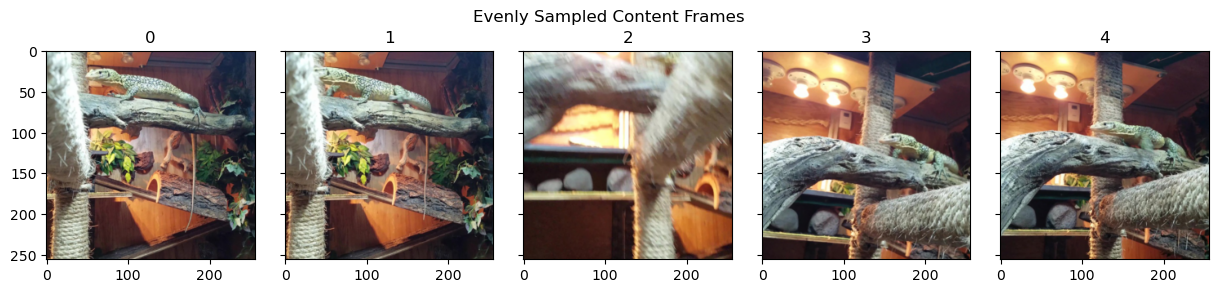

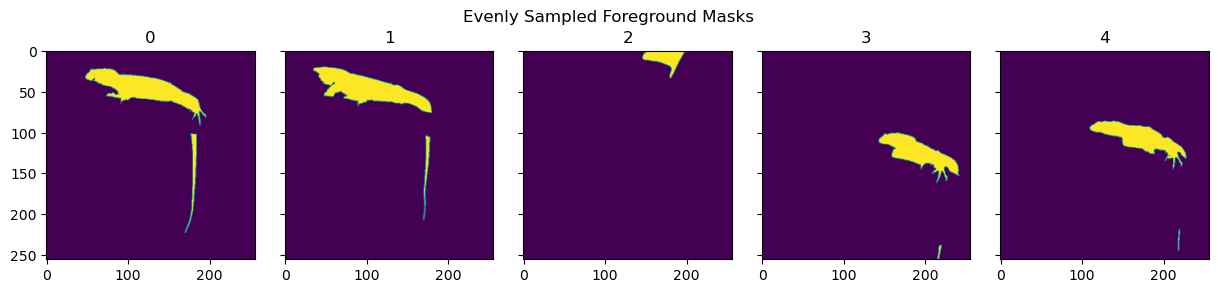

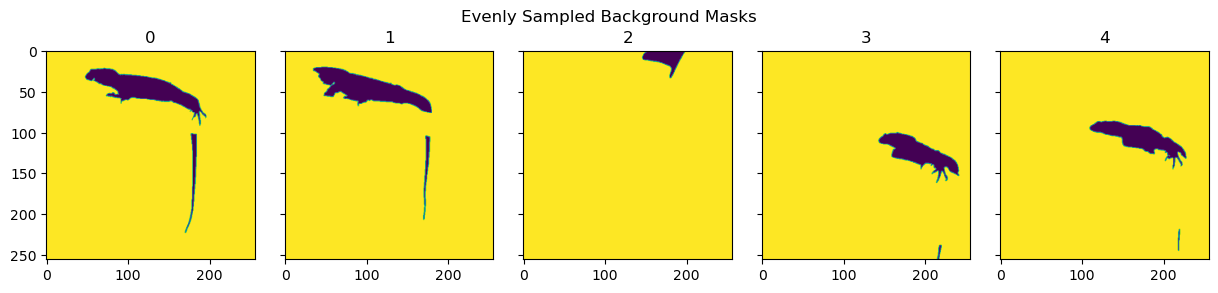

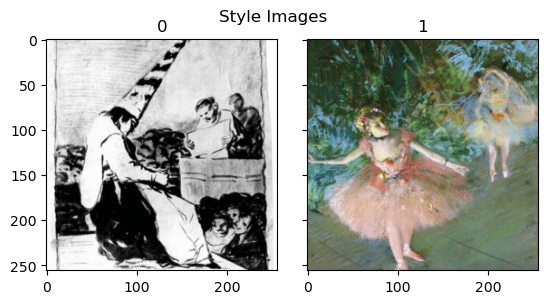

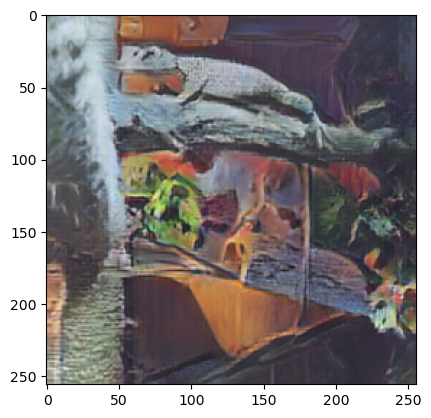

out min max :  tensor(-2.1349, device='cuda:0') tensor(3.4740, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


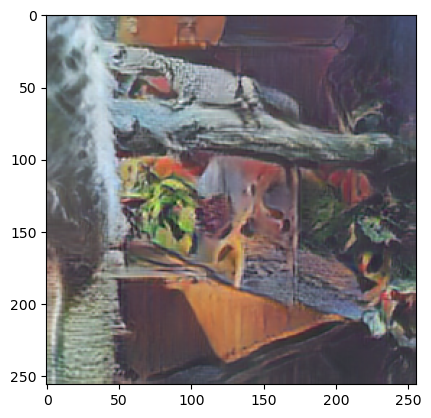

out min max :  tensor(-2.2020, device='cuda:0') tensor(4.2363, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


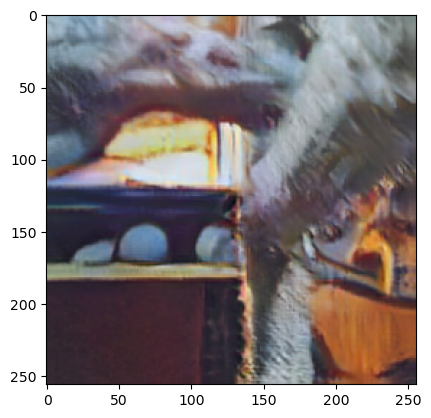

out min max :  tensor(-2.2987, device='cuda:0') tensor(3.7167, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


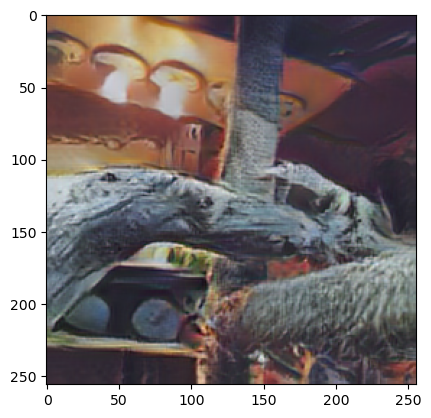

out min max :  tensor(-1.8674, device='cuda:0') tensor(3.5849, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


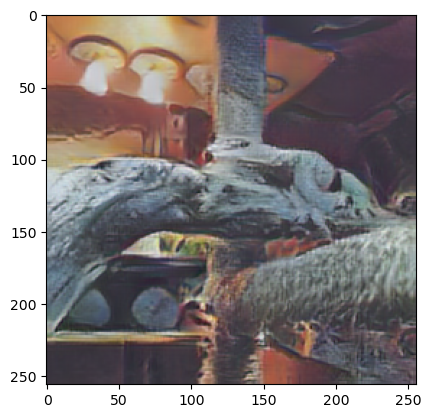

out min max :  tensor(-1.7094, device='cuda:0') tensor(3.8128, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


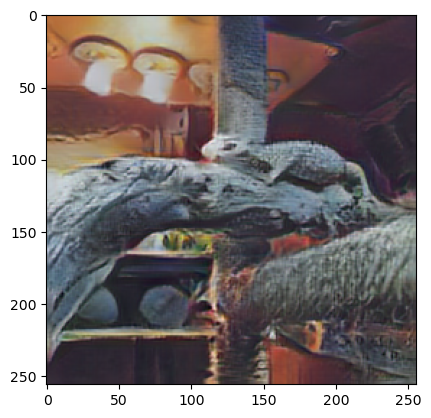

out min max :  tensor(-1.9706, device='cuda:0') tensor(3.5975, device='cuda:0') tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


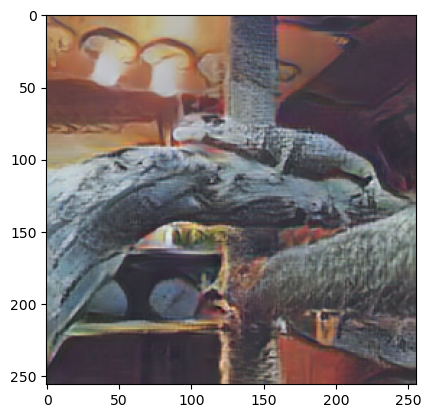

out min max :  tensor(-1.9405, device='cuda:0') tensor(3.7432, device='cuda:0') tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


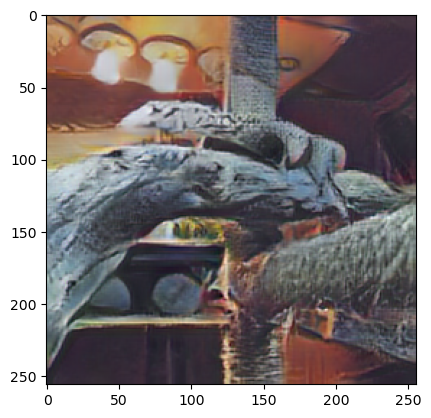

out min max :  tensor(-1.8192, device='cuda:0') tensor(3.6458, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


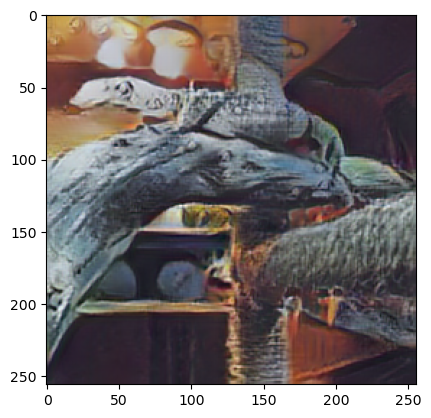

out min max :  tensor(-1.8935, device='cuda:0') tensor(4.4896, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')


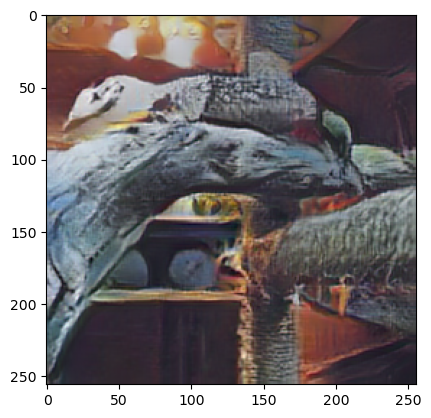

out min max :  tensor(-1.9525, device='cuda:0') tensor(3.2161, device='cuda:0') tensor(0., device='cuda:0') tensor(1., device='cuda:0')
torch.Size([40, 3, 256, 256])
denormalized out min max :  0 255


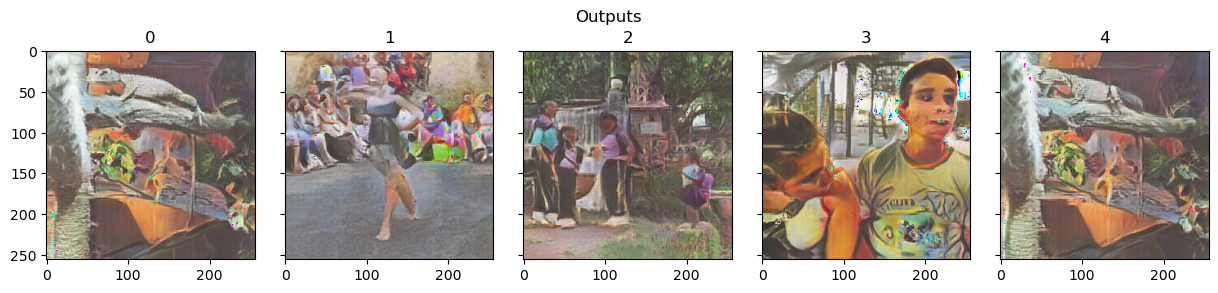

In [47]:
from torchvision.utils import save_image,make_grid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model_name = args['model_name']
vgg_pre_path = args['vgg_pre_path']
decoder_path = args['decoder_path']
model_pre_path = args['model_pre_path']

infer_model, infer_vgg_feature_extractor = get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path)

infer_model.eval()

count = 0
random_idx = np.random.randint(len(val_loader)-1)
for i ,(cont_imgs, mask_img_lists, style_img_lists) in enumerate(val_loader):
    if i < random_idx:
        continue
    #cont_img is B x num_frames x 3 x 256 x 256
    bs = cont_imgs.shape[0]
    plot_video(rows=1, cols=5, frame_list=denormalize(cont_imgs[0]), plot_width=15., plot_height=3.,
               title='Evenly Sampled Content Frames')
    plot_video(rows=1, cols=5, frame_list=(mask_img_lists[0][0] * 255).type(torch.uint8).permute(0,2,3,1).numpy(), plot_width=15., plot_height=3.,
               title='Evenly Sampled Foreground Masks')
    plot_video(rows=1, cols=5, frame_list=(mask_img_lists[0][1] * 255).type(torch.uint8).permute(0,2,3,1).numpy(), plot_width=15., plot_height=3.,
               title='Evenly Sampled Background Masks')
    plot_video(rows=1, cols=2, frame_list=denormalize(style_img_lists[0]), plot_width=15., plot_height=3.,
               title='Style Images')

    cpe_1_all = torch.randn(size=(bs, 64, 256, 256), dtype=torch.float32).to(device)
    cpe_2_all = torch.randn(size=(bs, 128, 128, 128), dtype=torch.float32).to(device)
    cpe_3_all = torch.randn(size=(bs, 256, 64, 64), dtype=torch.float32).to(device)
    cpe_4_all = torch.randn(size=(bs, 512, 32, 32), dtype=torch.float32).to(device)
    adap_1_all = torch.randn(size=(bs, 8, 128, 128), dtype=torch.float32).to(device)
    adap_2_all = torch.randn(size=(bs, 16, 64, 64), dtype=torch.float32).to(device)
    adap_3_all = torch.randn(size=(bs, 32, 32, 32), dtype=torch.float32).to(device)
    output_prev = torch.randn(size=(bs, 3, 256, 256), dtype=torch.float32).to(device)
    mask_img_list_prev = torch.randn(size=(bs, num_classes, 1, 256, 256), dtype=torch.float32).to(device)

    output_frames = []
    for frame_idx in range(cont_imgs.shape[1]):
        cont_img = cont_imgs[:,frame_idx,:,:,:].to(device)
        mask_img_list = mask_img_lists[:,:,frame_idx,:,:,:].to(device)
        style_img_list = style_img_lists.to(device)
        # print('training: ', i, cont_img.shape, (mask_img_list.shape), (style_img_list.shape))

        all_cont_feats = infer_vgg_feature_extractor(cont_img)
        cont_feat = all_cont_feats['layer4']
        all_style_feats_list = [infer_vgg_feature_extractor(style_img_list[:,i,:,:,:]) for i in range(num_classes)]
        style_feat_list = [all_style_feats_list[i]['layer4'] for i in range(num_classes)]

        if frame_idx == 0:
            cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all = all_cont_feats['layer1'], all_cont_feats['layer2'], all_cont_feats['layer3'], all_cont_feats['layer4']
            mask_img_list_prev = mask_img_list
        output, bilateral_grid, cpe_1_all_, cpe_2_all_, cpe_3_all_, cpe_4_all_, adap_1_all_, adap_2_all_, adap_3_all_ = infer_model(cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, f_beta=0.5, b_beta=0.1)

        output_prev = output.clone().detach()
        mask_img_list_prev = mask_img_list.clone().detach()

        grid_out = make_grid(output[0], nrow=1, normalize = True)

        plt.imshow(grid_out.cpu().detach().permute(1,2,0).numpy())
        plt.show()
        print('out min max : ', output.min(), output.max(), grid_out.min(), grid_out.max())
        output_frames.append(output)

    output_frames_tensor = torch.cat(output_frames, dim=0).to(device)
    print(output_frames_tensor.shape)
    denormalized_output = denormalize(output_frames_tensor.cpu())
    print('denormalized out min max : ', np.min(denormalized_output), np.max(denormalized_output))
    plot_video(rows=1, cols=5, frame_list=denormalized_output, plot_width=15., plot_height=3.,
               title='Outputs')
    count += 1
    if count > 0:
        break


torch.Size([4, 2, 1, 256, 256])
torch.Size([256, 256])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


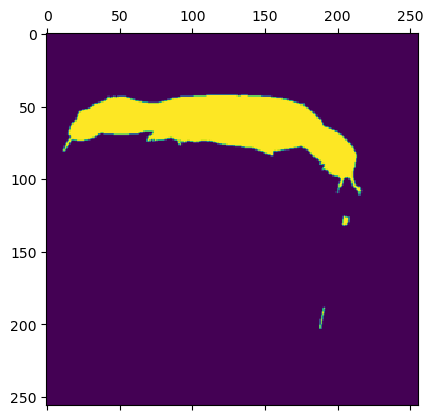

torch.Size([32, 32])
tensor(1234.3258, device='cuda:0') tensor(3846.7830, device='cuda:0')



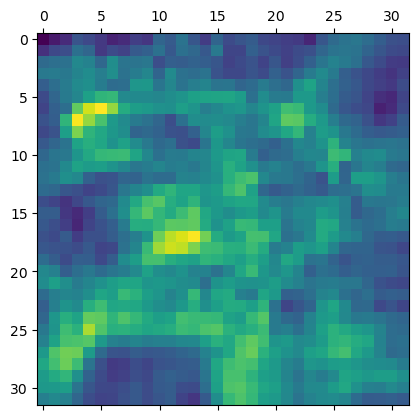

In [48]:
print(mask_img_list.shape)
temp = torch.squeeze(mask_img_list[0])[0]
print(temp.shape)
print(temp.min(), temp.max())
plt.matshow(temp.detach().cpu().numpy())
plt.show()

temp = torch.sum(torch.squeeze(bilateral_grid[0]), dim=0)
print(temp.shape)
print(temp.min(), temp.max())
print()
plt.matshow(temp.detach().cpu().numpy())
plt.show()


In [ ]:
# !wget https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/download?datasetVersionNumber=1

# Inference

In [11]:
# dataset_name = "DAVIS"
# project_root = '/home/hp2427/mvst'
# data_root = project_root + '/data'
# vid_root = data_root + '/videos'
# mask_root = data_root + '/masks'
# annotations_file_train = data_root + '/annotations_train.txt'
# annotations_file_val = data_root + '/annotations_val.txt'
# annotations_file_test = data_root + '/annotations_test.txt'

dataset_name = "MARIO"
project_root = '/home/hp2427/mvst'
data_root = '/scratch/hp2427/game_data/mario'
vid_root = data_root + '/mario_frames'
mask_root = data_root + '/mario_mask_frames'
annotations_file_train = data_root + '/mario_annotation_train.txt'
annotations_file_val = data_root + '/mario_annotation_val.txt'
annotations_file_test = data_root + '/mario_annotation_test.txt'

In [14]:
from torchvision.utils import save_image,make_grid

def run_inference(args):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)

    model_name = args['model_name']
    vgg_pre_path = args['vgg_pre_path']
    decoder_path = args['decoder_path']
    model_pre_path = args['model_pre_path']

    infer_model, infer_vgg_feature_extractor = get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path)

    infer_model.eval()

    use_stada = (model_name != "encdec_baseline_ada")

    count = 0
    bs = 1
    # num_frames = 50


    preprocess_cont = transforms.Compose([
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    preprocess_mask = transforms.Compose([
        torchvision.transforms.Grayscale(num_output_channels=1),
        torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    preprocess_style = transforms.Compose([
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        # transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # clip_26 0 2005 0
    # clip_27 0 144 0
    # clip_28 0 391 0
    # clip_29 0 1508 0
    # clip_30 0 522 0
    # content_video_dir_list = [vid_root + '/bear']
    # mask_video_dir_list = [mask_root + '/bear']
    # style_pair_paths_list = [(style_root + '/all/William_Turner_28.jpg', style_root + '/all/Vincent_van_Gogh_95.jpg')]
    # frame_prefix = ''
    # frame_ext = 'jpg'
    # mask_prefix = ''
    # mask_ext = 'png'
    # start_frame = 0
    frame_batch_count = 64
    
    if dataset_name == "MARIO":
        preprocess_mask = transforms.Compose([
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0.5), dtype=torch.float32)),
            transforms.Resize(256),  # image batch, resize smaller edge to 299
            transforms.CenterCrop(256),  # image batch, center crop to square 299x299
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        content_video_dir_list = [f'{vid_root}/clip_{j}' for j in range(26, 31)]
        mask_video_dir_list = [f'{mask_root}/clip_{j}' for j in range(26, 31)]
        num_frames_list = [2005, 144, 391, 1508, 522]
        frame_prefix = 'frame_'
        frame_ext = 'png'
        mask_prefix = 'mask_frame_'
        mask_ext = 'png'
        start_frame = 1
    
    style_pair_paths_list = [(style_root + '/all/William_Turner_28.jpg', style_root + '/all/Vincent_van_Gogh_95.jpg')]
    
    beta_vals = [0.25, 0.5, 0.75, 1]

    for content_video_dir, mask_video_dir, num_frames in zip(content_video_dir_list, mask_video_dir_list, num_frames_list):
        print(f'processing {content_video_dir}')
        for style_pair_path in style_pair_paths_list:
            style_f_path, style_b_path = style_pair_path
            print(f'\t with {style_f_path}, {style_b_path}')
            for beta in beta_vals:
                model_outputs_dir = sample_output_root + '/' + model_name
                out_frames_path = model_outputs_dir + content_video_dir[content_video_dir.rindex('/'):] + '_' + style_f_path[style_f_path.rindex('/')+1:style_f_path.rindex('.')] + '_' + style_b_path[style_b_path.rindex('/')+1:style_b_path.rindex('.')] + f'_beta_{beta}'.replace('.', '_')
                try:
                    os.mkdir(model_outputs_dir)
                    print(f'created {model_outputs_dir}')
                except OSError as error:
                    print(error)

                try:
                    os.mkdir(out_frames_path)
                    print(f'created {out_frames_path}')
                except OSError as error:
                    print(error)
                # read and transform content frames
                # read and transform mask frames
                # read and transform style images
        
                style_f = preprocess_style(torchvision.io.read_image(style_f_path).type(torch.float32)/255.0).unsqueeze(0)
                style_b = preprocess_style(torchvision.io.read_image(style_b_path).type(torch.float32)/255.0).unsqueeze(0)
                style_img_lists = torch.cat([style_f, style_b], dim = 0).unsqueeze(0)

                cpe_1_all = torch.randn(size=(bs, 64, 256, 256), dtype=torch.float32).to(device)
                cpe_2_all = torch.randn(size=(bs, 128, 128, 128), dtype=torch.float32).to(device)
                cpe_3_all = torch.randn(size=(bs, 256, 64, 64), dtype=torch.float32).to(device)
                cpe_4_all = torch.randn(size=(bs, 512, 32, 32), dtype=torch.float32).to(device)
                adap_1_all = torch.randn(size=(bs, 8, 128, 128), dtype=torch.float32).to(device)
                adap_2_all = torch.randn(size=(bs, 16, 64, 64), dtype=torch.float32).to(device)
                adap_3_all = torch.randn(size=(bs, 32, 32, 32), dtype=torch.float32).to(device)
                output_prev = torch.randn(size=(bs, 3, 256, 256), dtype=torch.float32).to(device)
                mask_img_list_prev = torch.randn(size=(bs, num_classes, 1, 256, 256), dtype=torch.float32).to(device)
                frame_idx_cur = start_frame
                while frame_idx_cur < start_frame + num_frames:
                    cont_imgs_ = []
                    mask_img_lists_ = []
                    for i in range(frame_idx_cur, min(frame_idx_cur + frame_batch_count, start_frame + num_frames)):
                        cont_frame = torchvision.io.read_image(content_video_dir + f'/{frame_prefix}{i:05d}.{frame_ext}').type(torch.float32)/255.0
                        mask_frame = torchvision.io.read_image(mask_video_dir + f'/{mask_prefix}{i:05d}.{mask_ext}').type(torch.float32)/255.0
            
                        #transform
                        cont_frame = cont_frame.unsqueeze(0)
                        mask_frame_f = mask_frame.unsqueeze(0)
                        mask_frame_b = (1.0 - mask_frame).unsqueeze(0)
                        mask_frame = torch.cat([mask_frame_f, mask_frame_b], dim=0).to(device)
            
                        cont_imgs_.append(cont_frame)
                        mask_img_lists_.append(preprocess_mask(mask_frame).unsqueeze(1))
            
                    cont_imgs = preprocess_cont(torch.cat(cont_imgs_, dim=0).to(device)).unsqueeze(0) #1 batch of frame_batch_count frames
                    mask_img_lists = torch.cat(mask_img_lists_, dim=1).to(device).unsqueeze(0)
            
            
                    output_frames = []
                    for frame_idx in range(cont_imgs.shape[1]):
                        cont_img = cont_imgs[:,frame_idx,:,:,:].to(device)
                        mask_img_list = mask_img_lists[:,:,frame_idx,:,:,:].to(device)
                        style_img_list = style_img_lists.to(device)
                        
                        all_cont_feats = infer_vgg_feature_extractor(cont_img)
                        cont_feat = all_cont_feats['layer4']
                        all_style_feats_list = [infer_vgg_feature_extractor(style_img_list[:,i,:,:,:]) for i in range(num_classes)]
                        style_feat_list = [all_style_feats_list[i]['layer4'] for i in range(num_classes)]
            
                        if frame_idx == 0:
                            cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all = all_cont_feats['layer1'], all_cont_feats['layer2'], all_cont_feats['layer3'], all_cont_feats['layer4']
                            mask_img_list_prev = mask_img_list
                        output, bilateral_grid, cpe_1_all_, cpe_2_all_, cpe_3_all_, cpe_4_all_, adap_1_all_, adap_2_all_, adap_3_all_ = infer_model(cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, use_stada = use_stada, f_beta = beta, b_beta = beta)
            
                        output_prev = output.clone().detach()
                        mask_img_list_prev = mask_img_list.clone().detach()
            
                        grid_out = make_grid(output, nrow=1, normalize = True)
                        #save grid_out to sample_output/bear/frame_count.jpg
                        # plt.imshow(grid_out.cpu().detach().permute(1,2,0).numpy())
                        # plt.show()
                        # print('out min max : ', output.shape, output.min(), output.max(), grid_out.shape, grid_out.min(), grid_out.max())
                        output_frames.append(output)
                        # break
            
                    output_frames_tensor = torch.cat(output_frames, dim=0).to(device)
                    for i in range(frame_idx_cur, frame_idx_cur + min(frame_batch_count, output_frames_tensor.shape[0])):
                        save_image(make_grid(output_frames_tensor[i - frame_idx_cur], nrow=1, normalize = True), out_frames_path + f'/{i:05d}.jpg')
                    frame_idx_cur += frame_batch_count
                    print(f'saved till {frame_idx_cur} frames')
                print(f'saved all frames to {out_frames_path}')


In [15]:
args = {}
args['decoder_path'] = checkpoints_root + '/decoder.pth'
args['vgg_pre_path'] = checkpoints_root + '/vgg_normalised.pth'
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_finetune_dec3_19_79.pth'
args['model_name'] = 'encdec_finetune_dec3'

run_inference(args)

Using device: cuda
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_finetune_dec3_19_79.pth
Number of trainable params for encdec_finetune_dec3 :  112451
processing /scratch/hp2427/game_data/mario/mario_frames/clip_26
	 with /scratch/hp2427/style/all/William_Turner_28.jpg, /scratch/hp2427/style/all/Vincent_van_Gogh_95.jpg
[Errno 17] File exists: '/scratch/hp2427/sample_output/encdec_finetune_dec3'
created /scratch/hp2427/sample_output/encdec_finetune_dec3/clip_26_William_Turner_28_Vincent_van_Gogh_95_beta_0_25


/state/partition1/job-46403807/ipykernel_2418428/3777234446.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0.5), dtype=torch.float32)),


saved till 65 frames
saved till 129 frames
saved till 193 frames
saved till 257 frames
saved till 321 frames
saved till 385 frames
saved till 449 frames
saved till 513 frames
saved till 577 frames
saved till 641 frames
saved till 705 frames
saved till 769 frames
saved till 833 frames
saved till 897 frames
saved till 961 frames
saved till 1025 frames
saved till 1089 frames
saved till 1153 frames
saved till 1217 frames
saved till 1281 frames
saved till 1345 frames
saved till 1409 frames
saved till 1473 frames
saved till 1537 frames
saved till 1601 frames
saved till 1665 frames
saved till 1729 frames
saved till 1793 frames
saved till 1857 frames
saved till 1921 frames
saved till 1985 frames
saved till 2049 frames
saved all frames to /scratch/hp2427/sample_output/encdec_finetune_dec3/clip_26_William_Turner_28_Vincent_van_Gogh_95_beta_0_25
[Errno 17] File exists: '/scratch/hp2427/sample_output/encdec_finetune_dec3'
created /scratch/hp2427/sample_output/encdec_finetune_dec3/clip_26_William_T

In [ ]:
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_baseline_ada_0_3.pth'
args['model_name'] = 'encdec_baseline_ada'
run_inference(args)

Using device: cuda
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_baseline_ada_0_3.pth
Number of trainable params for encdec_baseline_ada :  0
processing /scratch/hp2427/game_data/mario/mario_frames/clip_26
	 with /scratch/hp2427/style/all/William_Turner_28.jpg, /scratch/hp2427/style/all/Vincent_van_Gogh_95.jpg
[Errno 17] File exists: '/scratch/hp2427/sample_output/encdec_baseline_ada'
created /scratch/hp2427/sample_output/encdec_baseline_ada/clip_26_William_Turner_28_Vincent_van_Gogh_95_beta_0_25


/state/partition1/job-46403807/ipykernel_2418428/3777234446.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0.5), dtype=torch.float32)),


saved till 65 frames
saved till 129 frames
saved till 193 frames
saved till 257 frames
saved till 321 frames
saved till 385 frames
saved till 449 frames
saved till 513 frames
saved till 577 frames
saved till 641 frames
saved till 705 frames
saved till 769 frames


In [23]:
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_baseline_0_3.pth'
args['model_name'] = 'encdec_baseline'
run_inference(args)

Using device: cuda
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_baseline_0_3.pth
Number of trainable params for encdec_baseline :  0
processing /home/hp2427/mvst/data/videos/bear
	 with /scratch/hp2427/style/all/William_Turner_28.jpg, /scratch/hp2427/style/all/Vincent_van_Gogh_95.jpg


/state/partition1/job-46401813/ipykernel_905921/3275141003.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),


saved all frames to /scratch/hp2427/sample_output/encdec_baseline/bear_William_Turner_28_Vincent_van_Gogh_95_beta_1


In [24]:
args['model_pre_path'] = checkpoints_root + '/ckpt_encdec_finetune_dec3_mario_19_39.pth'
args['model_name'] = 'encdec_finetune_dec3_mario'
run_inference(args)

Using device: cuda
loaded vgg /home/hp2427/mvst/checkpoints/vgg_normalised.pth
loaded decoder /home/hp2427/mvst/checkpoints/decoder.pth
loaded model /home/hp2427/mvst/checkpoints/ckpt_encdec_finetune_dec3_mario_19_39.pth
Number of trainable params for encdec_finetune_dec3_mario :  112451
processing /home/hp2427/mvst/data/videos/bear
	 with /scratch/hp2427/style/all/William_Turner_28.jpg, /scratch/hp2427/style/all/Vincent_van_Gogh_95.jpg


/state/partition1/job-46401813/ipykernel_905921/3275141003.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),


saved all frames to /scratch/hp2427/sample_output/encdec_finetune_dec3_mario/bear_William_Turner_28_Vincent_van_Gogh_95_beta_1


In [ ]:
# !pip install ffmpeg

In [ ]:
# !ffmpeg -framerate 10  -i /home/hp2427/mvst/data/videos/bear/%05d.jpg  -c:v libx264 -r 30 /home/hp2427/mvst/sample_output/bear_original.mp4
# !ffmpeg -framerate 10  -i /home/hp2427/mvst/sample_output/bear/%05d.jpg  -c:v libx264 -r 30 /home/hp2427/mvst/sample_output/bear_stylized.mp4

# Inference in pixel space

In [ ]:
from torchvision.utils import save_image,make_grid

def run_inference(args):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)

    model_name = args['model_name']
    vgg_pre_path = args['vgg_pre_path']
    decoder_path = args['decoder_path']
    model_pre_path = args['model_pre_path']

    infer_model, infer_vgg_feature_extractor = get_mvst_model(model_name, vgg_pre_path, decoder_path, model_pre_path)

    infer_model.eval()

    use_stada = (model_name != "encdec_baseline_ada")

    count = 0
    bs = 1
    num_frames = 50


    preprocess_cont = transforms.Compose([
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    preprocess_mask = transforms.Compose([
        torchvision.transforms.Grayscale(num_output_channels=1),
        torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0), dtype=torch.float32)),
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    if dataset_name == "MARIO":
        preprocess_mask = transforms.Compose([
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.Lambda(lambda x : torch.tensor((x > 0.5), dtype=torch.float32)),
            transforms.Resize(256),  # image batch, resize smaller edge to 299
            transforms.CenterCrop(256),  # image batch, center crop to square 299x299
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    preprocess_style = transforms.Compose([
        transforms.Resize(256),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(256),  # image batch, center crop to square 299x299
        # transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    content_video_dir_list = [vid_root + '/bear']
    mask_video_dir_list = [mask_root + '/bear']
    style_pair_paths_list = [(style_root + '/all/William_Turner_28.jpg', style_root + '/all/Vincent_van_Gogh_95.jpg')]
    beta_vals = [1]

    for content_video_dir, mask_video_dir in zip(content_video_dir_list, mask_video_dir_list):
        print(f'processing {content_video_dir}')
        for style_pair_path in style_pair_paths_list:
            style_f_path, style_b_path = style_pair_path
            print(f'\t with {style_f_path}, {style_b_path}')
            for beta in beta_vals:
                model_outputs_dir = sample_output_root + '/' + model_name
                out_frames_path = model_outputs_dir + content_video_dir[content_video_dir.rindex('/'):] + '_' + style_f_path[style_f_path.rindex('/')+1:style_f_path.rindex('.')] + '_' + style_b_path[style_b_path.rindex('/')+1:style_b_path.rindex('.')] + f'_beta_{beta}'
                try:
                    os.mkdir(model_outputs_dir)
                    os.mkdir(out_frames_path)
                except OSError as error:
                    print(error)
                # read and transform content frames
                # read and transform mask frames
                # read and transform style images
                cont_imgs_ = []
                mask_img_lists_ = []
        
                style_f = preprocess_style(torchvision.io.read_image(style_f_path).type(torch.float32)/255.0).unsqueeze(0)
                style_b = preprocess_style(torchvision.io.read_image(style_b_path).type(torch.float32)/255.0).unsqueeze(0)
                style_img_lists = torch.cat([style_f, style_b], dim = 0).unsqueeze(0)
        
                for i in range(num_frames):
                    cont_frame = torchvision.io.read_image(content_video_dir + f'/{i:05d}.jpg').type(torch.float32)/255.0
                    mask_frame = torchvision.io.read_image(mask_video_dir + f'/{i:05d}.png').type(torch.float32)/255.0
        
                    #transform
                    cont_frame = cont_frame.unsqueeze(0)
                    mask_frame_f = mask_frame.unsqueeze(0)
                    mask_frame_b = (1.0 - mask_frame).unsqueeze(0)
                    mask_frame = torch.cat([mask_frame_f, mask_frame_b], dim=0).to(device)
        
                    cont_imgs_.append(cont_frame)
                    mask_img_lists_.append(preprocess_mask(mask_frame).unsqueeze(1))
        
                cont_imgs = preprocess_cont(torch.cat(cont_imgs_, dim=0).to(device)).unsqueeze(0)
                mask_img_lists = torch.cat(mask_img_lists_, dim=1).to(device).unsqueeze(0)
        
                cpe_1_all = torch.randn(size=(bs, 64, 256, 256), dtype=torch.float32).to(device)
                cpe_2_all = torch.randn(size=(bs, 128, 128, 128), dtype=torch.float32).to(device)
                cpe_3_all = torch.randn(size=(bs, 256, 64, 64), dtype=torch.float32).to(device)
                cpe_4_all = torch.randn(size=(bs, 512, 32, 32), dtype=torch.float32).to(device)
                adap_1_all = torch.randn(size=(bs, 8, 128, 128), dtype=torch.float32).to(device)
                adap_2_all = torch.randn(size=(bs, 16, 64, 64), dtype=torch.float32).to(device)
                adap_3_all = torch.randn(size=(bs, 32, 32, 32), dtype=torch.float32).to(device)
                output_prev = torch.randn(size=(bs, 3, 256, 256), dtype=torch.float32).to(device)
                mask_img_list_prev = torch.randn(size=(bs, num_classes, 1, 256, 256), dtype=torch.float32).to(device)
        
                output_frames = []
                for frame_idx in range(cont_imgs.shape[1]):
                    cont_img = cont_imgs[:,frame_idx,:,:,:].to(device)
                    mask_img_list = mask_img_lists[:,:,frame_idx,:,:,:].to(device)
                    style_img_list = style_img_lists.to(device)
                    
                    all_cont_feats = infer_vgg_feature_extractor(cont_img)
                    cont_feat = all_cont_feats['layer4']
                    all_style_feats_list = [infer_vgg_feature_extractor(style_img_list[:,i,:,:,:]) for i in range(num_classes)]
                    style_feat_list = [all_style_feats_list[i]['layer4'] for i in range(num_classes)]
        
                    if frame_idx == 0:
                        cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all = all_cont_feats['layer1'], all_cont_feats['layer2'], all_cont_feats['layer3'], all_cont_feats['layer4']
                        mask_img_list_prev = mask_img_list
                    output, bilateral_grid, cpe_1_all_, cpe_2_all_, cpe_3_all_, cpe_4_all_, adap_1_all_, adap_2_all_, adap_3_all_ = infer_model(cont_img, mask_img_list, style_img_list, mask_img_list_prev, cpe_1_all, cpe_2_all, cpe_3_all, cpe_4_all, adap_1_all, adap_2_all, adap_3_all, use_stada = use_stada, f_beta = beta, b_beta = beta)
        
                    output_prev = output.clone().detach()
                    mask_img_list_prev = mask_img_list.clone().detach()
        
                    grid_out = make_grid(output, nrow=1, normalize = True)
                    #save grid_out to sample_output/bear/frame_count.jpg
                    # plt.imshow(grid_out.cpu().detach().permute(1,2,0).numpy())
                    # plt.show()
                    # print('out min max : ', output.shape, output.min(), output.max(), grid_out.shape, grid_out.min(), grid_out.max())
                    output_frames.append(output)
                    # break
        
                output_frames_tensor = torch.cat(output_frames, dim=0).to(device)
                for i in range(output_frames_tensor.shape[0]):
                    save_image(make_grid(output_frames_tensor[i], nrow=1, normalize = True), out_frames_path + f'/{i:05d}.jpg')
                print(f'saved all frames to {out_frames_path}')
